# *Credit Card Fraud Detection - Task 1*

![logo](images/logo1.jpg)

In [1]:
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings

from geopandas import GeoDataFrame
from shapely.geometry import Point

%matplotlib inline

warnings.filterwarnings('ignore')

## Compreensão do Tema

### Compreensão do Tema

Uma fraude de cartão de crédito ocorre quando um indivíduo não autorizado acede à informação do cartão de crédito de outra pessoa para fazer compras em seu nome, indevidamente.

Estas fraudes são um problema cada vez mais comum e recorrente na atualidade, pelo que todas as entidades envolvidas investem significativamente em descobrir padrões e indicadores que podem indiciar situações ou tentativas de fraude.

### Determinação dos Objetivos do Tema

De maneira a ir ao encontro das necessidades dos bancos, reguladores e fornecedores de cartões de crédito, é essencial conseguir prever corretamente se uma transação financeira é, com alta probabilidade, fraudulenta.

Como tal, torna-se extremamente útil desenvolver um modelo que identifique eficazmente transações suspeitas de fraude, de maneira a aumentar a segurança financeira e a reduzir as atividades fraudulentas.

### Avaliação da Situação

Os dados disponíveis para análise foram fornecidos por uma empresa de cartões de crédito, correspondendo a informação de 2023, com registos sobre clientes e comerciantes.

O conjunto de dados inclui informação detalhada sobre transações, clientes, comerciantes e cidades, estando cada transação detalhada como legítima ou fraudulenta, permitindo uma abordagem de aprendizagem supervisionada para identificar padrões indicadores de fraude.

### Determinação dos Objetivos de Mineração de Dados

O problema consiste em prever se uma transação é, ou não, fraudulenta, tendo como base um conjunto de dados associados à transação, ou seja, classificar cada transação como pertencente a um de dois grupos, mutuamente exclusivos: fraudulenta ou legítima (não fraudulenta).

Para resolver o problema, deve ser desenvolvido um modelo de aprendizagem computacional supervisionada com capacidade para efetuar uma classificação binária que distinga os dois casos possíveis para cada transação.

Pretende-se que o modelo, devidamente treinado seguindo uma abordagem de aprendizagem supervisionada, tenha uma exatidão de TODO% a classificar os dados de teste, considerando-se, nesse caso, garantida a sua viabilidade prática.

Tendo em conta que é mais importante capturar todas as transações fraudulentas, ainda que correndo o risco de incluir algumas transações legítimas, do que só identificar as transações garantidamente fraudulentas, mas deixando escapar algumas transações fraudulentas, espera-se que o modelo tenha um *recall* mais elevado do que a sua precisão, ainda que ambas as medidas de desempenho devam retornar valores elevados. TODO - nesta secção?

## Compreensão dos Dados

### Recolha dos Dados Iniciais

O *dataset* fornecido é constituído por quatro ficheiros, dividindo a informação da forma abaixo exposta.

1. **cities.csv:** informação sobre várias cidades
2. **customers.csv:** informação demográfica de cada cliente
3. **merchants.csv:** detalhes de cada comerciante
4. **transactions.csv:** registos de transações individuais

In [2]:
cities = pd.read_csv("data/cities.csv")
customers = pd.read_csv("data/customers.csv")
merchants = pd.read_csv("data/merchants.csv")
transactions = pd.read_csv("data/transactions.csv")

O ficheiro **cities.csv**, que contém informação sobre várias cidades, é constituído por 5 linhas e 5 colunas.

In [3]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      5 non-null      object 
 1   lat       5 non-null      float64
 2   long      5 non-null      float64
 3   city_pop  5 non-null      int64  
 4   state     5 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 332.0+ bytes


Cada linha representa uma cidade e as colunas são as seguintes:

0. **city:** nome da cidade
1. **lat:** latitude da cidade
2. **lon:** longitude da cidade
3. **city_pop:** população da cidade
4. **state:** estado a que pertence a cidade

In [4]:
cities.head()

,city,lat,long,city_pop,state
0,Los Angeles,34.0522,-118.2437,3979576,CA
1,Houston,29.7604,-95.3698,2328000,TX
2,Phoenix,33.4484,-112.0740,1680992,AZ
3,Chicago,41.8781,-87.6298,2716000,IL
4,New York,40.7128,-74.0060,8419600,NY


O ficheiro **customers.csv**, que contém a informação demográfica de cada cliente, é constituído por 1100 linhas e 9 colunas.

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc_num  1100 non-null   int64  
 1   first   1100 non-null   object 
 2   last    1100 non-null   object 
 3   gender  1100 non-null   object 
 4   street  1100 non-null   object 
 5   city    1100 non-null   object 
 6   zip     1080 non-null   float64
 7   job     1080 non-null   object 
 8   dob     1100 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 77.5+ KB


Cada linha representa um cliente e as colunas são as seguintes:

0. **cc_num:** número do cartão de crédito do cliente
1. **first:** primeiro nome do cliente
2. **last:** último nome do cliente
3. **gender:** género do cliente
4. **street:** rua da morada do cliente
5. **city:** cidade da morada do cliente
6. **zip:** código-postal da morada do cliente
7. **job:** emprego do cliente
8. **dob:** data de nascimento do cliente

In [6]:
customers.head()

,cc_num,first,last,gender,street,city,zip,job,dob
0,2468117351683689,Jane,Clark,M,1st Ave,Los Angeles,14540.0,Lawyer,1992-12-07
1,7312796986089604,Alice,Johnson,F,Elm St,Houston,24562.0,Clerk,1969-09-29
2,8219705739824918,Bob,Clark,M,1st Ave,Phoenix,60521.0,Doctor,2002-12-20
3,9983622937436029,Jane,Johnson,F,2nd Ave,Phoenix,71277.0,Teacher,1970-03-13
4,5847400826403727,Bob,Johnson,M,Maple St,Los Angeles,69097.0,Engineer,1986-08-20


O ficheiro **merchants.csv**, que contém os detalhes de cada comerciante, é constituído por 100 linhas e 5 colunas.

In [7]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   merchant     100 non-null    object 
 1   category     98 non-null     object 
 2   merch_lat    98 non-null     float64
 3   merch_long   100 non-null    float64
 4   merchant_id  100 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


Cada linha representa um comerciante e as colunas são as seguintes:

0. **merchant:** nome do comerciante
1. **category:** categoria do negócio do comerciante
2. **merch_lat:** latitude do comerciante
3. **merch_lon:** longitude do comerciante
4. **merchant_id:** identificador único do comerciante

In [8]:
merchants.head()

,merchant,category,merch_lat,merch_long,merchant_id
0,Merchant_1,Groceries,-27.531230,-129.203915,1
1,Merchant_2,Groceries,-41.654886,90.051574,2
2,Merchant_3,Groceries,40.156147,108.606189,3
3,Merchant_4,Apparel,-61.315035,-49.025479,4
4,Merchant_5,Apparel,57.517665,-155.894706,5


O ficheiro **transactions.csv**, que contém os registos de transações individuais, é constituído por 30000 linhas e 9 colunas.

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  30000 non-null  int64  
 1   trans_date_trans_time  29900 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   device_os              12036 non-null  object 
 4   merchant               30000 non-null  object 
 5   amt                    29900 non-null  float64
 6   trans_num              30000 non-null  object 
 7   unix_time              30000 non-null  int64  
 8   is_fraud               30000 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.1+ MB


Cada linha representa uma transação e as colunas são as seguintes:

0. **index:** índice da transação
1. **trans_date_trans_time:** data e hora da transação
2. **cc_num:** número do cartão de crédito associado à transação
3. **device_os:** sistema operativo a partir do qual foi efetuada a transação
4. **merchant:** nome do comerciante da transação
5. **amt:** quantia da transação
6. **trans_num:** número único da transação
7. **unix_time:** *timestamp* *Unix* da transação
8. **is_fraud:** etiqueta que indica se a transação foi fraudulenta (1) ou não (0)

In [10]:
transactions.head()

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
0,5381,2023-01-01 00:39:03,2801374844713453,NaN,Merchant_85,252.75,TRANS_662964,1672533543,0
1,4008,2023-01-01 01:16:08,3460245159749480,NaN,Merchant_23,340.17,TRANS_134939,1672535768,0
2,1221,2023-01-01 01:24:28,7308701990157768,macOS,Merchant_70,76.38,TRANS_258923,1672536268,0
3,9609,2023-01-01 02:06:57,8454886440761098,X11,Merchant_33,368.88,TRANS_226814,1672538817,0
4,5689,2023-01-01 02:10:54,6350332939133843,NaN,Merchant_90,323.32,TRANS_668449,1672539054,0


Os atributos *trans_data_trans_time*/*unix_time*, *merchant* e *amt* parecem ser aqueles mais relevantes para determinar o valor da variável-alvo (*is_fraud*), por serem os que mais se relacionam com a transação propriamente dita.

Em sentido contrário, as colunas *index*, *trans_num*, *merchant_id*, *first* e *last* deverão ser completamente irrelevantes para o modelo, por serem meramente indicativas. Por isso, estas colunas poderão vir a ser eliminadas numa próxima fase.

Tendo em conta que existe um número bastante elevado de dados (30000 transações, que serão divididos em conjuntos de treino e de teste) e de informação adicional (sobre cidades, clientes e comerciantes), é expectável que se consigam extrair conclusões pertinentes a partir dos dados, isto é, fazer previsões/classificações acertadas, pelo que não se afigura necessário procurar novos dados.

Para além disto, o número de atributos considera-se mais do que suficiente para o problema a tratar, pelo que a dimensionalidade poderá ter de ser reduzida de maneira a evitar a "maldição da dimensionalidade".

Sendo os dados provenientes de uma só origem, não se antecipam quaisquer problemas de compatibilidade/coerência.

Por último, os casos de valores em falta e/ou incorretos serão analisados individualmente: se possível, os valores serão corrigidos ou imputados; senão, as linhas serão eliminadas, visto que o número total de dados é suficiente para a criação de um modelo robusto.

### Descrição dos Dados

A quantidade de dados disponíveis (30000 transações com a respetiva informação) parece adequada para o modelo pretendido, permitindo o desenvolvimento de um modelo simultaneamente eficaz (em termos de exatidão) e eficiente (em termos de tempo de processamento computacional).

A eliminação de colunas/atributos irrelevantes deverá ser suficiente para escapar à maldição da dimensionalidade e evitar *overfitting*, bem como melhorar o desempenho do programa.

Os tipos dos valores e as respetivas escalas apresentam-se abaixo.

**Cidades:** 5 linhas e 5 colunas

| Atributo | Tipo | Escala | Formato |
| -------- | ---- | ------ | ------- |
| **city** | categórico | nominal | *string* |
| **lat** | numérico contínuo | rácio | número decimal |
| **long** | numérico contínuo | rácio | número decimal |
| **city_pop** | numérico discreto | rácio | número inteiro |
| **state** | categórico | nominal | *string* |

Portanto, todos os dados de cidades estão representados/codificados de forma adequada.

In [11]:
cities.dtypes

city         object
lat         float64
long        float64
city_pop      int64
state        object
dtype: object

**Clientes:** 1100 linhas e 9 colunas

| Atributo | Tipo | Escala | Formato |
| -------- | ---- | ------ | ------- |
| **cc_num** | categórico | nominal | número inteiro |
| **first** | categórico | nominal | *string* |
| **last** | categórico | nominal | *string* |
| **gender** | categórico | nominal | *string* |
| **street** | categórico | nominal | *string* |
| **city** | categórico | nominal | *string* |
| **zip** | categórico | nominal | número decimal |
| **job** | categórico | nominal | *string* |
| **dob** | categórico | ordinal | *string* |

Neste caso, os atributos *cc_num* e *zip* são valores categóricos com escala nominal - por não representarem quantidades e não haver uma ordem entre eles -, mas estão representados como números (inteiros e decimais, respetivamente), pelo que não se encontram codificados da forma mais apropriada.

Como tal, caso se pretenda a sua ingestão por parte do modelo, os formatos de representação das colunas *cc_num* e *zip* terão de ser codificados.

In [12]:
customers.dtypes

cc_num      int64
first      object
last       object
gender     object
street     object
city       object
zip       float64
job        object
dob        object
dtype: object

**Comerciantes:** 100 linhas e 5 colunas

| Atributo | Tipo | Escala | Formato |
| -------- | ---- | ------ | ------- |
| **merchant** | categórico | nominal | *string* |
| **category** | categórico | nominal | *string* |
| **merch_lat** | numérico contínuo | rácio | número decimal |
| **merch_long** | numérico contínuo | rácio | número decimal |
| **merchant_id** | categórico | nominal | número inteiro |

Aqui, todos os atributos estão representados adequadamente, com exceção de *merchant_id*, que está codificado como um número inteiro, mas é um valor categórico nominal, dado que, apesar de ser representado por um número, corresponde a um identificador que não traduz nenhuma relação de ordem significativa.

Deste modo, o formato da coluna *merchant_id* terá de, posteriormente, ser codificado, caso se pretenda a sua ingestão por parte do modelo.

In [13]:
merchants.dtypes

merchant        object
category        object
merch_lat      float64
merch_long     float64
merchant_id      int64
dtype: object

**Transações:** 30000 linhas e 9 colunas

| Atributo | Tipo | Escala | Formato |
| -------- | ---- | ------ | ------- |
| **index** | categórico | nominal | número inteiro |
| **trans_date_trans_time** | categórico | ordinal | *string* |
| **cc_num** | categórico | nominal | número inteiro | 
| **device_os** | categórico | nominal | *string* |
| **merchant** | categórico | nominal | *string* |
| **amt** | numérico contínuo | rácio | número decimal |
| **trans_num** | categórico | nominal | *string* |
| **unix_time** | numérico discreto | intervalar | número inteiro |
| **is_fraud** | categórico | nominal | número inteiro |

Neste conjunto de transações, as colunas *index*, *cc_num* e *is_fraud* deveriam ter um formato mais adequado ao seu significado.

Ou seja, tal como anteriormente, estas colunas são do tipo categórico com escala nominal porque, embora os seus valores sejam números inteiros, a ordem entre eles é arbitrária, pelo que, numa fase mais avançada do processo de desenvolvimento, os formatos terão de ser codificados garantir um tratamento adequado por parte do modelo.

Note-se ainda que a coluna *trans_date_trans_time* é a única com formato *string* que representa valores categóricos ordinais (em vez de nominais), o que poderia levar à necessidade de alguma atenção redobrada num momento posterior, mas, na verdade, esta coluna deverá ser removida por traduzir a mesma informação que a coluna *unix_time* que, por sua vez, tem uma representação mais adequada.

In [14]:
transactions.dtypes

index                      int64
trans_date_trans_time     object
cc_num                     int64
device_os                 object
merchant                  object
amt                      float64
trans_num                 object
unix_time                  int64
is_fraud                   int64
dtype: object

Em todo o *dataset*, a única coluna que se pode considerar codificada é *is_fraud*, sendo que o esquema de codificação consiste em representar "verdadeiro"/"sim" como 1 e "falso"/"não" como 0. Nenhuma das restantes colunas está codificada.

Compreendidos os tipos e as escalas dos dados, podem compilar-se algumas estatísticas descritivas sobre os mesmos - como a contagem, a unicidade, a frequência, a média, o desvio padrão, os extremos (mínimo e máximo) e os quartis (incluindo a mediana) dos valores presentes em cada coluna -, tendo em vista a constatação de factos e a extração de conclusões.

In [15]:
cities.describe(include = 'all')

,city,lat,long,city_pop,state
count,5,5.000000,5.000000,5.000000e+00,5
unique,5,NaN,NaN,NaN,5
top,Los Angeles,NaN,NaN,NaN,CA
freq,1,NaN,NaN,NaN,1
mean,NaN,35.970380,-97.464660,3.824834e+06,NaN
std,NaN,5.147702,18.004326,2.701939e+06,NaN
min,NaN,29.760400,-118.243700,1.680992e+06,NaN
25%,NaN,33.448400,-112.074000,2.328000e+06,NaN
50%,NaN,34.052200,-95.369800,2.716000e+06,NaN
75%,NaN,40.712800,-87.629800,3.979576e+06,NaN


Do conjunto de cidades, observa-se que:

- Existem apenas 5 cidades distintas, todas nos Estados Unidos da América;
- A cidade mais populosa tem mais de 8 milhões de habitantes, estando este valor extremamente distante dos restantes para a mesma coluna.

In [16]:
customers.describe(include = 'all')

,cc_num,first,last,gender,street,city,zip,job,dob
count,1.100000e+03,1100,1100,1100,1100,1100,1080.000000,1080,1100
unique,NaN,108,108,2,102,6,NaN,7,1062
top,NaN,Jane,Clark,F,2nd Ave,Los Angeles,NaN,Lawyer,1965-06-13
freq,NaN,143,142,588,171,218,NaN,172,3
mean,5.568427e+15,NaN,NaN,NaN,NaN,NaN,54974.311111,NaN,NaN
std,2.631567e+15,NaN,NaN,NaN,NaN,NaN,26095.544522,NaN,NaN
min,1.001432e+15,NaN,NaN,NaN,NaN,NaN,10008.000000,NaN,NaN
25%,3.278527e+15,NaN,NaN,NaN,NaN,NaN,32349.250000,NaN,NaN
50%,5.591926e+15,NaN,NaN,NaN,NaN,NaN,55868.500000,NaN,NaN
75%,7.955166e+15,NaN,NaN,NaN,NaN,NaN,77178.250000,NaN,NaN


Quanto aos clientes, verifica-se que:

- A proporção de clientes homens/mulheres é razoavelmente equilibrada (41%/59%);
- Como existem 6 cidades presentes no conjunto de clientes, pelo menos uma delas não estará mapeada no conjunto de cidades (por serem 5), pelo que não terá informações/detalhes adicionais;
- Existem apenas 7 profissões distintas de clientes.

In [17]:
merchants.describe(include = 'all')

,merchant,category,merch_lat,merch_long,merchant_id
count,100,98,98.000000,100.000000,100.000000
unique,100,5,NaN,NaN,NaN
top,Merchant_1,Groceries,NaN,NaN,NaN
freq,1,24,NaN,NaN,NaN
mean,NaN,NaN,3.211835,-7.469285,50.500000
std,NaN,NaN,55.815166,104.049544,29.011492
min,NaN,NaN,-88.616543,-178.256215,1.000000
25%,NaN,NaN,-45.648175,-102.881546,25.750000
50%,NaN,NaN,0.289348,-17.104837,50.500000
75%,NaN,NaN,49.163174,90.432801,75.250000


Sobre os comerciantes, constata-se que:

- Existem apenas 5 categorias distintas de comerciantes;
- O espaço geográfico no qual se encontram os comerciantes é muito mais abrangente do que o espaço geográfico das cidades, isto é, haverá muitos comerciantes que - pelas suas coordenadas (latitude e longitude) - não se situam nos Estados Unidos da América.

In [18]:
transactions.describe(include = 'all')

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
count,30000.00000,29900,3.000000e+04,12036,30000,29900.000000,30000,3.000000e+04,30000.000000
unique,NaN,29868,NaN,5,101,NaN,29470,NaN,NaN
top,NaN,2023-03-19 03:05:24,NaN,Windows,Merchant_72,NaN,TRANS_600014,NaN,NaN
freq,NaN,2,NaN,3049,339,NaN,4,NaN,NaN
mean,14994.93820,NaN,5.638691e+15,NaN,NaN,250.063287,NaN,1.705650e+09,0.019033
std,8664.71394,NaN,2.743709e+15,NaN,NaN,144.106058,NaN,1.530499e+07,0.136644
min,0.00000,NaN,1.001432e+15,NaN,NaN,1.010000,NaN,1.672534e+09,0.000000
25%,7478.75000,NaN,3.256119e+15,NaN,NaN,125.235000,NaN,1.696269e+09,0.000000
50%,14999.50000,NaN,5.491563e+15,NaN,NaN,249.625000,NaN,1.706376e+09,0.000000
75%,22499.25000,NaN,8.149117e+15,NaN,NaN,375.242500,NaN,1.718328e+09,0.000000


Por último, relativamente às transações, evidencia-se que:

- Existem 2 transações efetuadas exatamente ao mesmo tempo (com ano, dia, hora, minuto e segundo coincidentes), que poderão ser a mesma;
- Como existem 101 comerciantes presentes no conjunto de transações, pelo menos um deles não estará mapeado no conjunto de comerciantes (por serem 100), pelo que não terá informações/detalhes adicionais;
- Existem várias transações com o mesmo número (*trans_num*), que deverão ser duplicadas;
- No conjunto de dados considerado, apenas 2% das transações são fraudulentas.

Assim, é possível concluir que:

- O conjunto de dados é desequilibrado, visto que a variável-alvo (*is_fraud*) não divide as transações em dois grupos com aproximadamente o mesmo tamanho, mas sim num grupo com cerca de 600 transações (fraudulentas) e noutro com cerca de 294000 transações (legítimas), ou seja, quase 50 vezes maior;
- Para além das hipóteses levantadas anteriormente, talvez exista alguma relação entre a legitimidade de uma transação e a localização geográfica do comerciante, isto é, uma transação poderá ser fraudulenta com maior probabilidade se o comerciante se situar fora dos Estados Unidos da América.

### Exploração dos Dados

Nesta fase, desenham-se os gráficos devidamente contextualizados para os atributos considerados relevantes, tendo em vista a extração de novas conclusões.

In [19]:
def contextualize(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Como serão desenhados alguns mapas, define-se desde já a variável com o planisfério.

In [20]:
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

Para o conjunto de cidades, os únicos gráficos que podem ser interessantes visualizar são um mapa com a localização de cada cidade e um diagrama de caixa e bigodes com a população de cada cidade, de modo a verificar a correção dos dados.

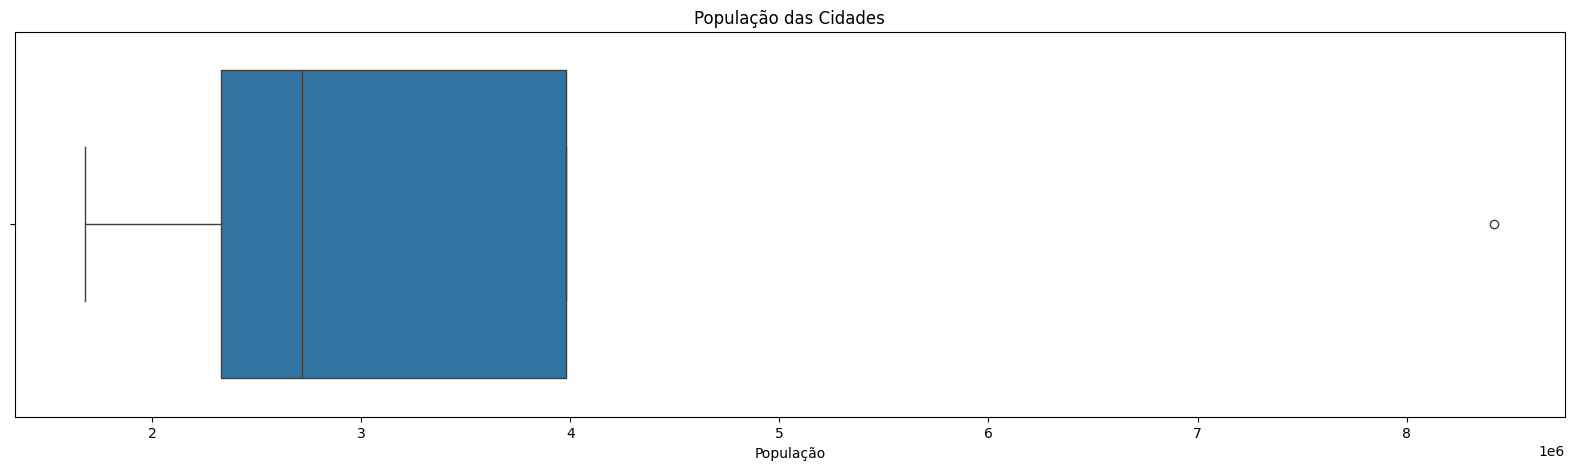

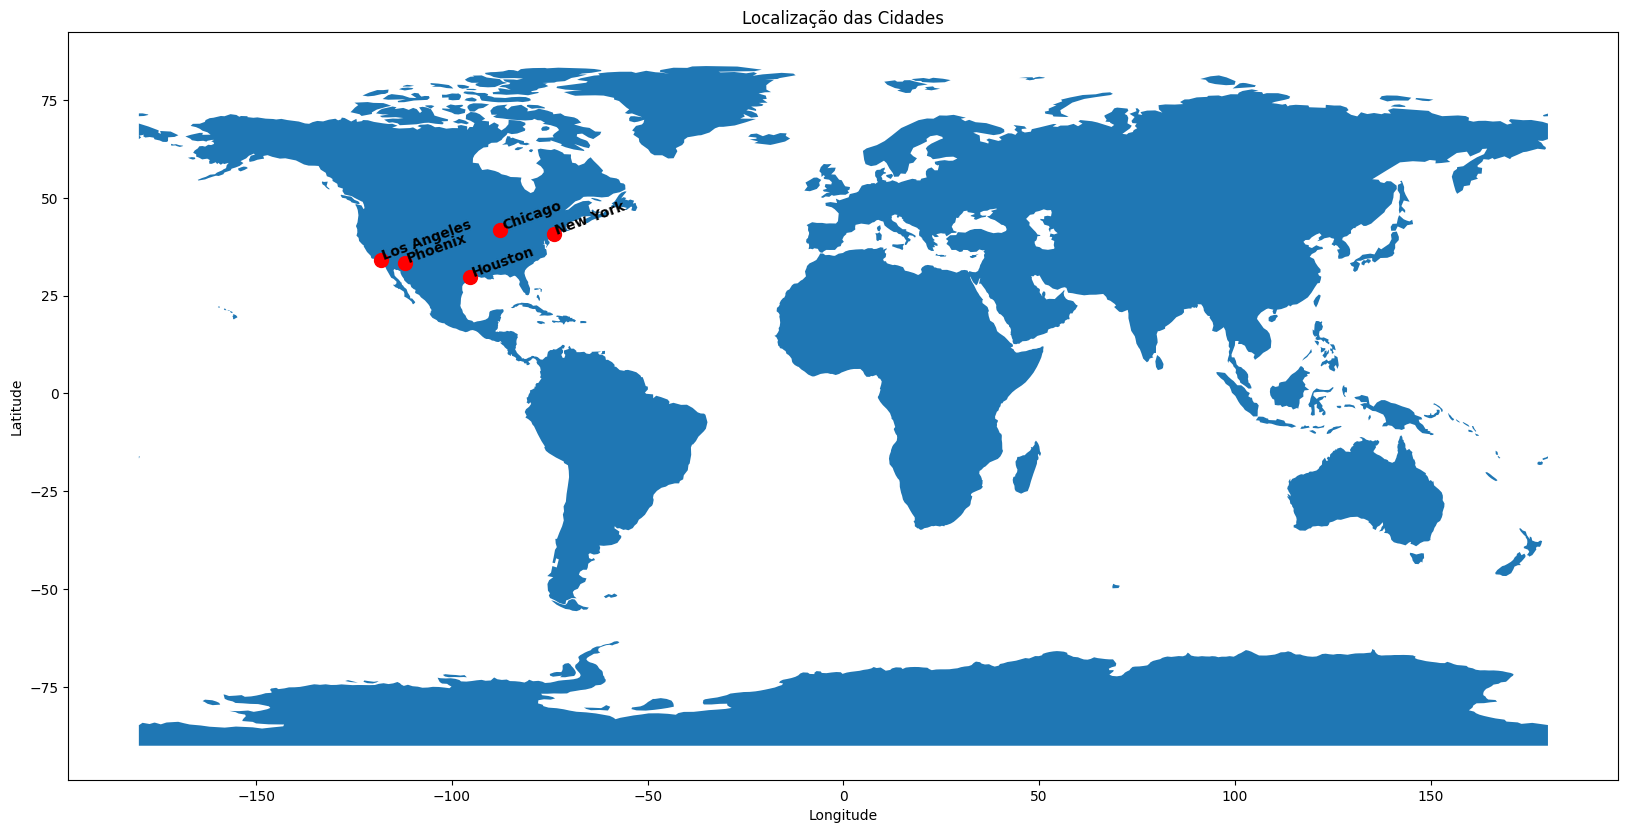

In [21]:
plt.figure(figsize = (20, 5))

sb.boxplot(x = cities['city_pop'])
contextualize('População das Cidades', 'População', '')

geometry = [Point(coordinates) for coordinates in zip(cities['long'], cities['lat'])]
gdf = GeoDataFrame(cities, geometry = geometry)

ax = world.plot(figsize = (20, 10))
ax.set_title('Localização das Cidades')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

gdf.plot(ax = ax, color = 'red', markersize = 100)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['city']):
    ax.text(x, y, label, fontweight = 'bold', rotation = 20)

O único ponto que aparece como *outlier* no diagrama de caixa e bigodes é a população máxima no conjunto de cidades (8419600 habitantes) que, tal como observado anteriormente, está fora do intervalo inter-quartis para os dados desta coluna, mas este valor, relativo à cidade *New York* (como visto inicialmente), está correto, ou seja, corresponde à realidade, pelo que não deve ser corrigido.

A par disso, tal como é possível verificar através do mapa, as coordenadas geográficas das cidades parecem estar aproximadamente corretas, isto é, situadas nos Estados Unidos da América e, por isso, com correspondência com a realidade.

Dado o conjunto de clientes, pode visualizar-se a sua distribuição por cidade, por profissão e por idade (derivada a partir da data de nascimento), distinguindo entre os dois géneros possíveis, na tentativa de encontrar algum padrão significativo nos dados.

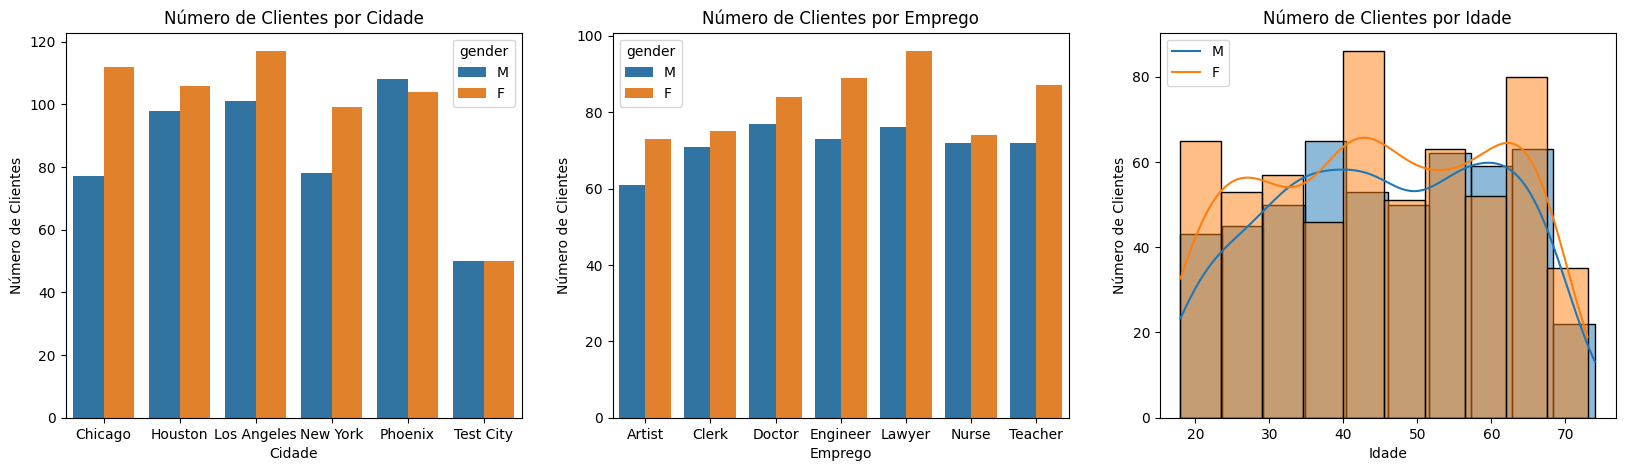

In [22]:
customers['age'] = (pd.to_datetime('today') - pd.to_datetime(customers['dob'])).dt.days // 365

plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
sb.countplot(data = customers, x = 'city', hue = 'gender', order = sorted(customers['city'].dropna().unique()))
contextualize('Número de Clientes por Cidade', 'Cidade', 'Número de Clientes')

plt.subplot(1, 3, 2)
sb.countplot(data = customers, x = 'job', hue = 'gender', order = sorted(customers['job'].dropna().unique()))
contextualize('Número de Clientes por Emprego', 'Emprego', 'Número de Clientes')

plt.subplot(1, 3, 3)
sb.histplot(data = customers[customers['gender'] == 'M']['age'], label = 'M', bins = 10, kde = True)
sb.histplot(data = customers[customers['gender'] == 'F']['age'], label = 'F', bins = 10, kde = True)
plt.legend(plt.gca().get_legend_handles_labels()[1])
contextualize('Número de Clientes por Idade', 'Idade', 'Número de Clientes')

customers = customers.drop('age', axis = 1)

Observando os três gráficos acima, a distribuição dos dados não parece ter nenhum aspeto a salientar, destacando-se apenas a cidade *Test City* como sendo aquela que não se encontra no conjunto de cidades com informação detalhada, cuja existência já fora constatada previamente.
Posteriormente, poderá ser relevante explorar com mais detalhe esta cidade para perceber se tem algum significado de relevo.

Considerando o conjunto de comerciantes, pode ser relevante visualizar a sua distribuição por categoria e a localização no mapa.

Enquanto a distribuição por categoria visa apenas - tal como anteriormente - procurar a existência de algum padrão que se saliente nos dados, a localização geográfica dos comerciantes pode ser importante para perceber se existe alguma relação com essa informação e a legitimidade das transações efetuadas em cada um deles.

Tendo em conta que, por um lado, todos os clientes (à exceção dos residentes em *Test City*) pertencem a cidades nos Estados Unidos da América, mas, por outro lado, muitos comerciantes não se encontram nos Estados Unidos da América, pode haver alguma relação entre a localização geográfica do comerciante e a legitimidade de uma transação a ele associada, tal como, por exemplo, uma transação ser mais provavelmente fraudulenta se efetuada num comerciante fora dos Estados Unidos da América.

<Axes: title={'center': 'Localização dos Comerciantes'}, xlabel='Longitude', ylabel='Latitude'>

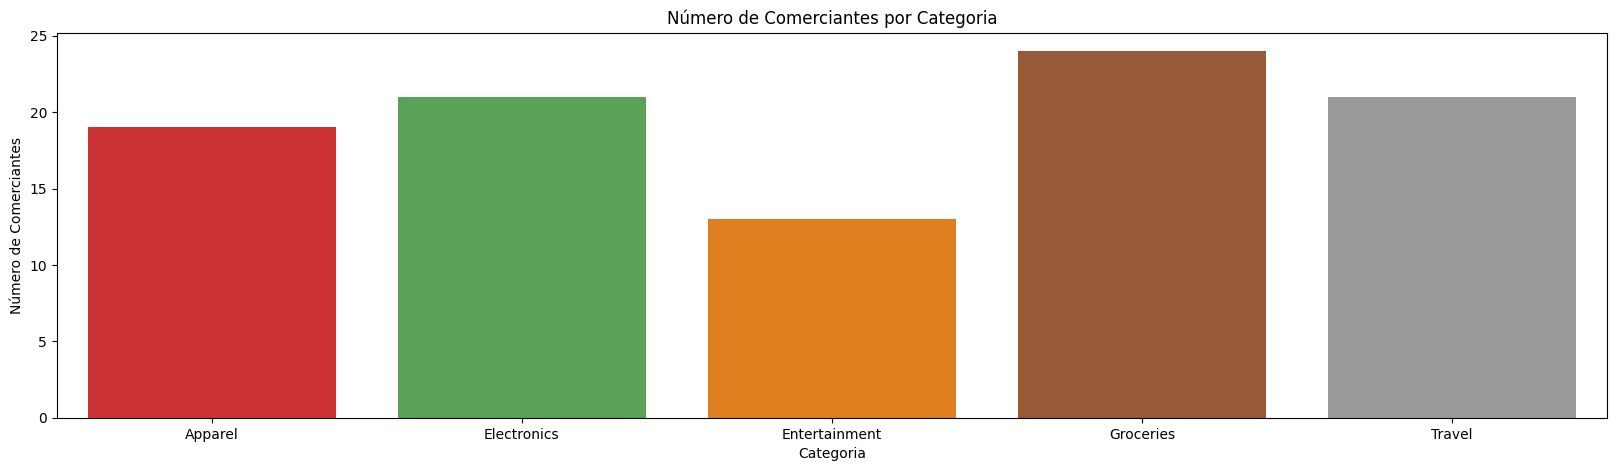

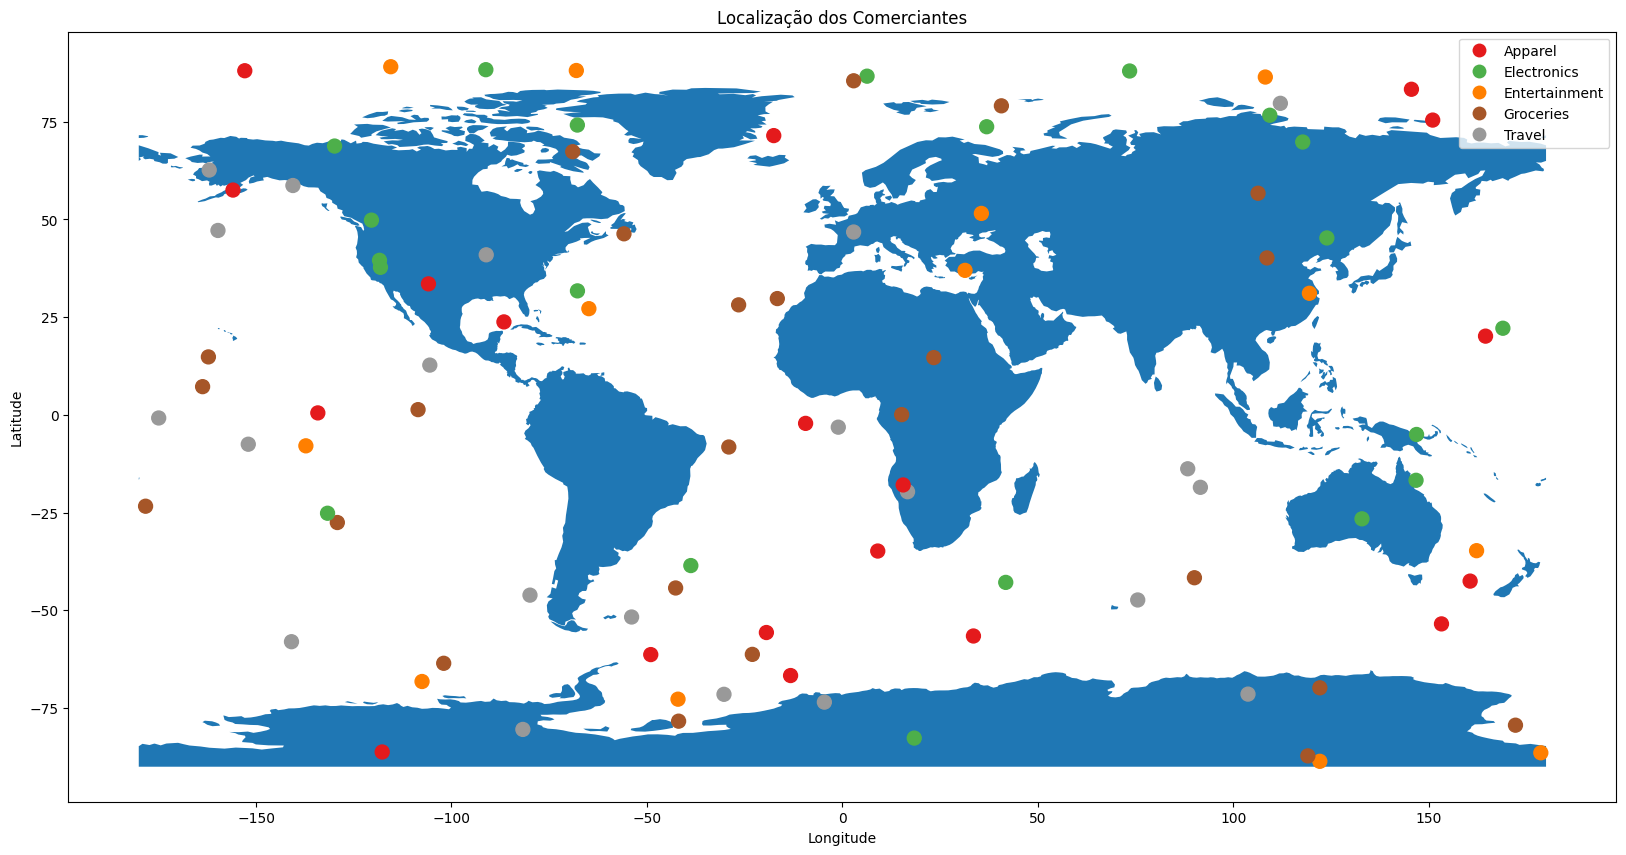

In [23]:
plt.figure(figsize = (20, 5))

sb.countplot(data = merchants, x = 'category', palette = {'Apparel': '#e41a1c', 'Electronics': '#4daf4a', 'Entertainment': '#ff7f00', 'Groceries': '#a65628', 'Travel': '#999999'}, order = sorted(merchants['category'].dropna().unique()))
contextualize('Número de Comerciantes por Categoria', 'Categoria', 'Número de Comerciantes')

geometry = [Point(coordinates) for coordinates in zip(merchants['merch_long'], merchants['merch_lat'])]
gdf = GeoDataFrame(merchants, geometry = geometry)

ax = world.plot(figsize = (20, 10))
ax.set_title('Localização dos Comerciantes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

gdf.plot(ax = ax, column = 'category', cmap = 'Set1', legend = True, markersize = 100)

Ao observar a distribuição dos comerciantes por categoria, não se destaca nenhum padrão que permita extrair qualquer informação/conclusão.

Contudo, visualizando a localização geográfica dos comerciantes no mapa, observa-se que as coordenadas de muitos comerciantes remetem para lugares que se encontram no oceano, ou seja, em localizações impossíveis para um comerciante.
Assim sendo, assume-se que a localização não é uma informação confiável, pelo que deverá vir a ser descartada posteriormente.

No caso do conjunto de transações, existem vários gráficos que se devem explorar.

Em particular, pode procurar-se algum padrão na distribuição de transações fraudulentas por hora, ou por dia da semana, ou por mês.

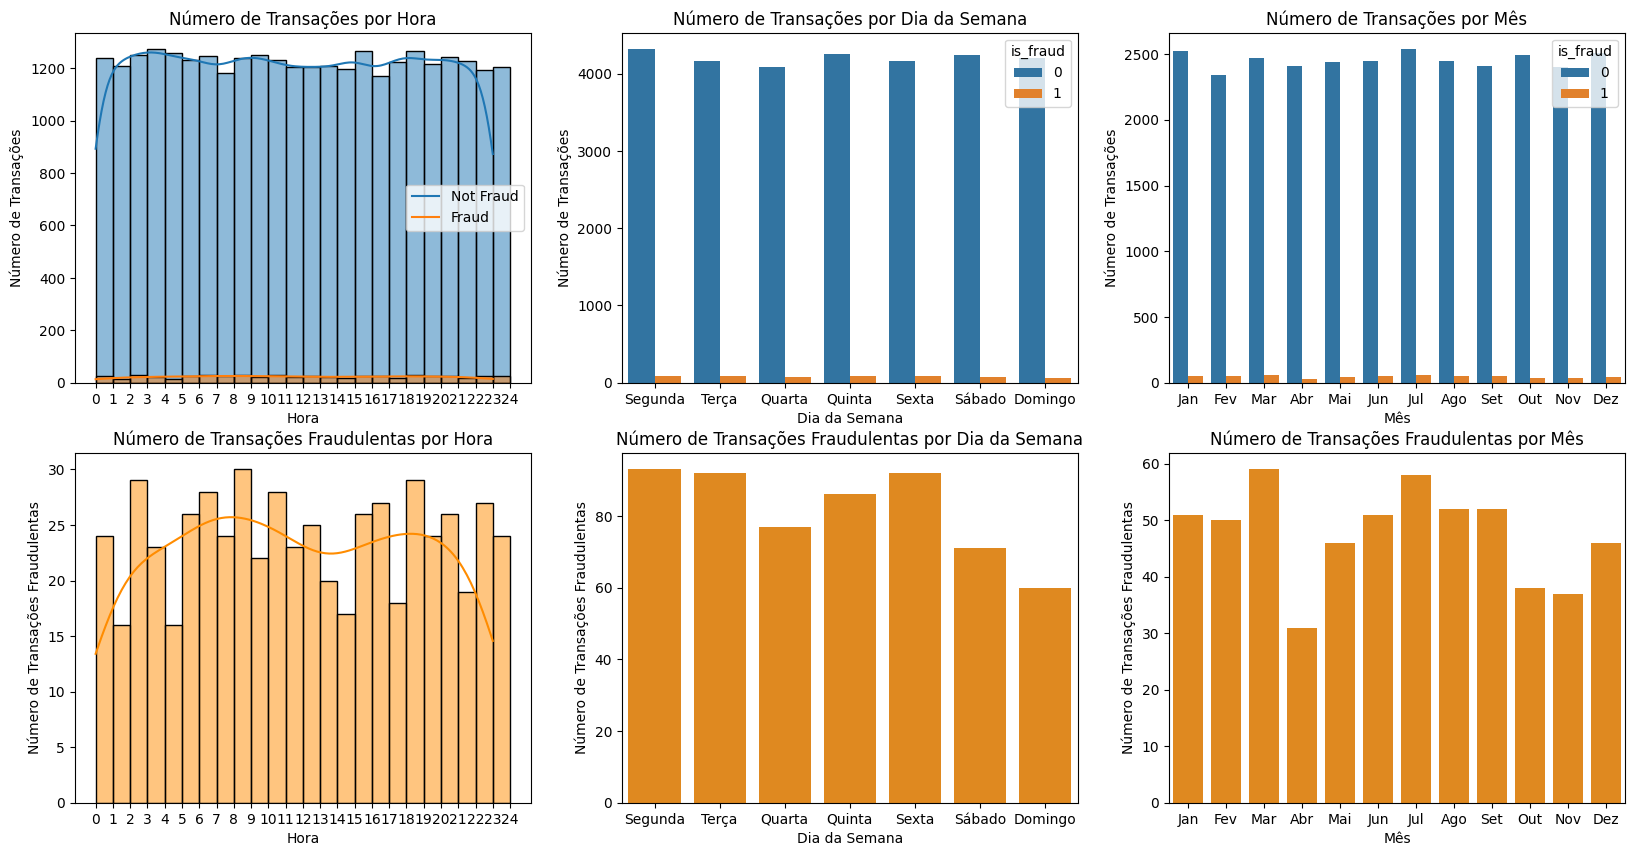

In [24]:
transactions['hour'] = pd.to_datetime(transactions['unix_time'], unit = 's').dt.hour
transactions['weekday'] = pd.to_datetime(transactions['unix_time'], unit = 's').dt.weekday
transactions['month'] = pd.to_datetime(transactions['unix_time'], unit = 's').dt.month

plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
sb.histplot(transactions[transactions['is_fraud'] == 0]['hour'], label = 'Not Fraud', bins = range(25), kde = True)
sb.histplot(transactions[transactions['is_fraud'] == 1]['hour'], label = 'Fraud', bins = range(25), kde = True)
plt.legend(plt.gca().get_legend_handles_labels()[1])
plt.xticks(range(25))
contextualize('Número de Transações por Hora', 'Hora', 'Número de Transações')

plt.subplot(2, 3, 2)
sb.countplot(data = transactions, x = 'weekday', hue = 'is_fraud', order = sorted(transactions['weekday'].dropna().unique()))
plt.xticks(ticks = range(7), labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
contextualize('Número de Transações por Dia da Semana', 'Dia da Semana', 'Número de Transações')

plt.subplot(2, 3, 3)
sb.countplot(data = transactions, x = 'month', hue = 'is_fraud', order = sorted(transactions['month'].dropna().unique()))
plt.xticks(ticks = range(12), labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
contextualize('Número de Transações por Mês', 'Mês', 'Número de Transações')

plt.subplot(2, 3, 4)
sb.histplot(transactions[transactions['is_fraud'] == 1]['hour'], bins = range(25), kde = True, color = 'darkorange')
plt.xticks(range(25))
contextualize('Número de Transações Fraudulentas por Hora', 'Hora', 'Número de Transações Fraudulentas')

plt.subplot(2, 3, 5)
sb.countplot(data = transactions[transactions['is_fraud'] == 1], x = 'weekday', color = 'darkorange', order = sorted(transactions['weekday'].dropna().unique()))
plt.xticks(ticks = range(7), labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
contextualize('Número de Transações Fraudulentas por Dia da Semana', 'Dia da Semana', 'Número de Transações Fraudulentas')

plt.subplot(2, 3, 6)
sb.countplot(data = transactions[transactions['is_fraud'] == 1], x = 'month', color = 'darkorange', order = sorted(transactions['month'].dropna().unique()))
plt.xticks(ticks = range(12), labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
contextualize('Número de Transações Fraudulentas por Mês', 'Mês', 'Número de Transações Fraudulentas')

transactions = transactions.drop('hour', axis = 1)
transactions = transactions.drop('weekday', axis = 1)
transactions = transactions.drop('month', axis = 1)

Efetivamente, desprezando ligeiras flutuações, não se consegue extrair nenhuma conclusão significativa da análise deste gráficos.

Verifica-se uma tendência de existirem alguns intervalos de horas com menos transações fraudulentas, bem como uma menor ocorrência das mesmas ao fim de semana (principalmente ao domingo) e no mês de abril, mas estas informações não parecem ser muito relevantes por não se salientarem de forma extremamente evidente, nem parecer haver uma justificação lógica para as mesmas que não seja serem puramente fruto do acaso.

Ainda assim, a discriminação de cada transação na sua hora, dia, mês e dia da semana pode ser relevante para o modelo extrair conclusões sobre a legitimidade da transação.

Pode ainda ser interessante verificar se existe alguma relação entre a legitimidade de uma transação e o sistema operativo associado ao dispositivo em que foi efetuada, bem como relativamente à quantia das mesmas.

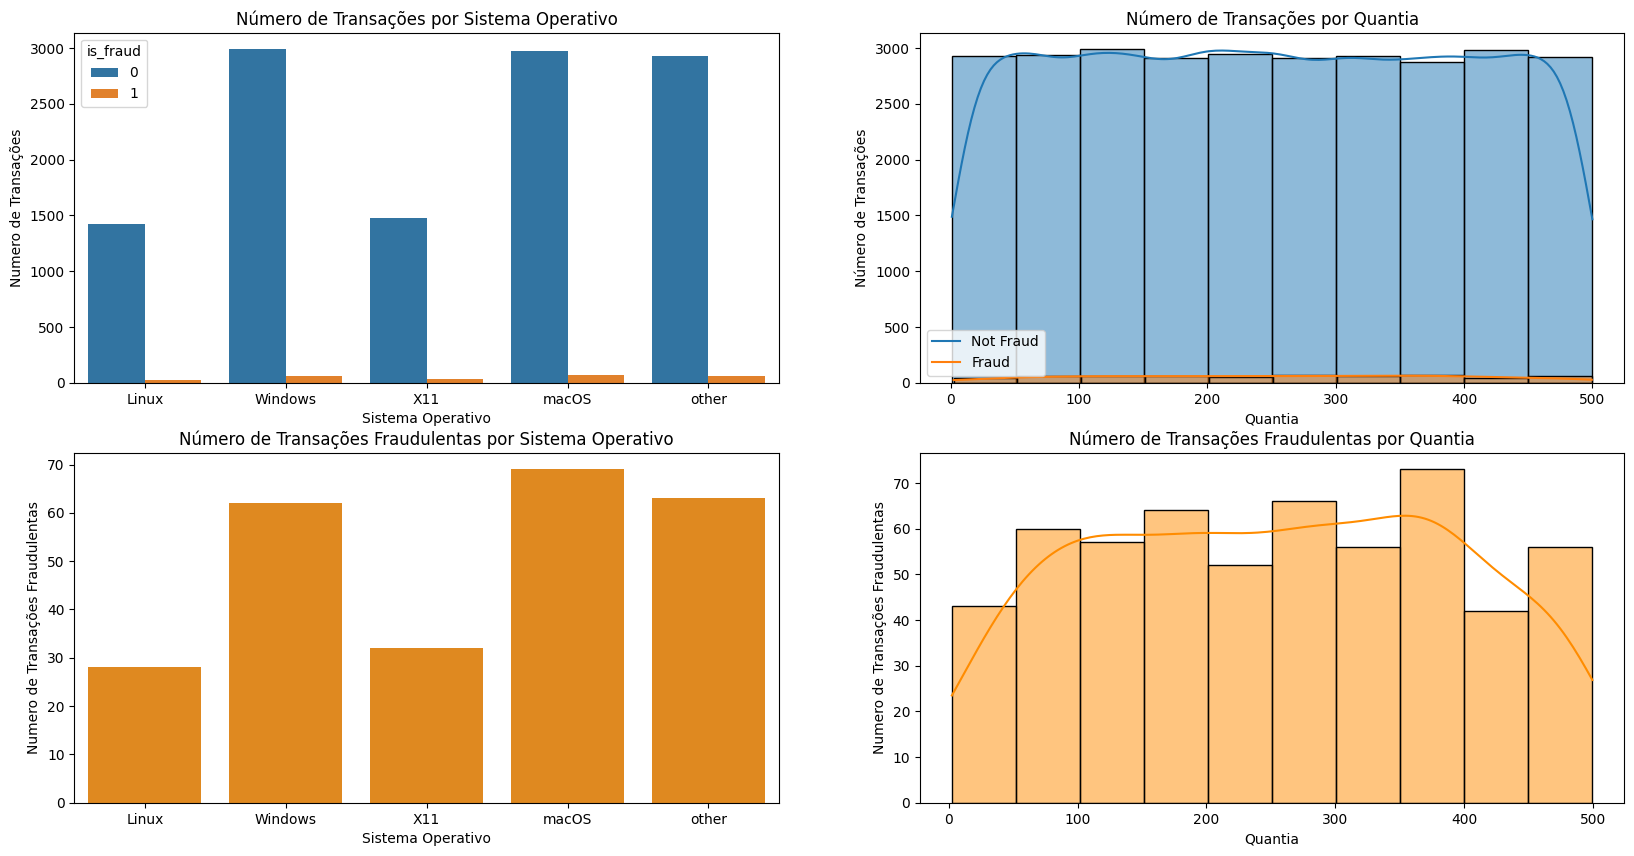

In [25]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sb.countplot(data = transactions, x = 'device_os', hue = 'is_fraud', order = sorted(transactions['device_os'].dropna().unique()))
contextualize('Número de Transações por Sistema Operativo', 'Sistema Operativo', 'Numero de Transações')

plt.subplot(2, 2, 2)
sb.histplot(data = transactions[transactions['is_fraud'] == 0]['amt'], label = 'Not Fraud', bins = 10, kde = True)
sb.histplot(data = transactions[transactions['is_fraud'] == 1]['amt'], label = 'Fraud', bins = 10, kde = True)
plt.legend(plt.gca().get_legend_handles_labels()[1])
contextualize('Número de Transações por Quantia', 'Quantia', 'Número de Transações')

plt.subplot(2, 2, 3)
sb.countplot(data = transactions[transactions['is_fraud'] == 1], x = 'device_os', color = 'darkorange', order = sorted(transactions['device_os'].dropna().unique()))
contextualize('Número de Transações Fraudulentas por Sistema Operativo', 'Sistema Operativo', 'Numero de Transações Fraudulentas')

plt.subplot(2, 2, 4)
sb.histplot(data = transactions[transactions['is_fraud'] == 1]['amt'], bins = 10, kde = True, color = 'darkorange')
contextualize('Número de Transações Fraudulentas por Quantia', 'Quantia', 'Numero de Transações Fraudulentas')

Contudo, ao observar os gráficos desenhados, também não parece haver nenhuma relação muito evidente entre o sistema operativo e a legitimidade de uma transação.

Quanto à quantia, a única conclusão que se pode extrair é que parece existir uma tendência para as transações fraudulentas estarem associadas a montantes medianos (entre os 100 e os 400), isto é, nem extremamente baixos (< 100), nem extremamente altos (> 400).

A explicação para isto pode residir em dois fatores. Por um lado, na perspetiva de um atacante, uma transação fraudulenta de quantia reduzida pode não compensar/justificar o risco de ser apanhado. Por outro lado, admitindo que uma transação de quantia elevada é alvo de mais escrutínio, um atacante pode também considerar que tentar uma transação fraudulenta acima de um dado valor será demasiado arriscado e aumentará a probabilidade de ser detetado. Por isso, poderá haver uma tendência para as transações fraudulentas estarem associadas a montantes suficientemente elevados para justificarem o risco que lhes é inerente, mas suficientemente reduzidos para não serem demasiado arriscadas.

Pode também ser relevante procurar alguma ligação entre as transações fraudulentas e determinados comerciantes.

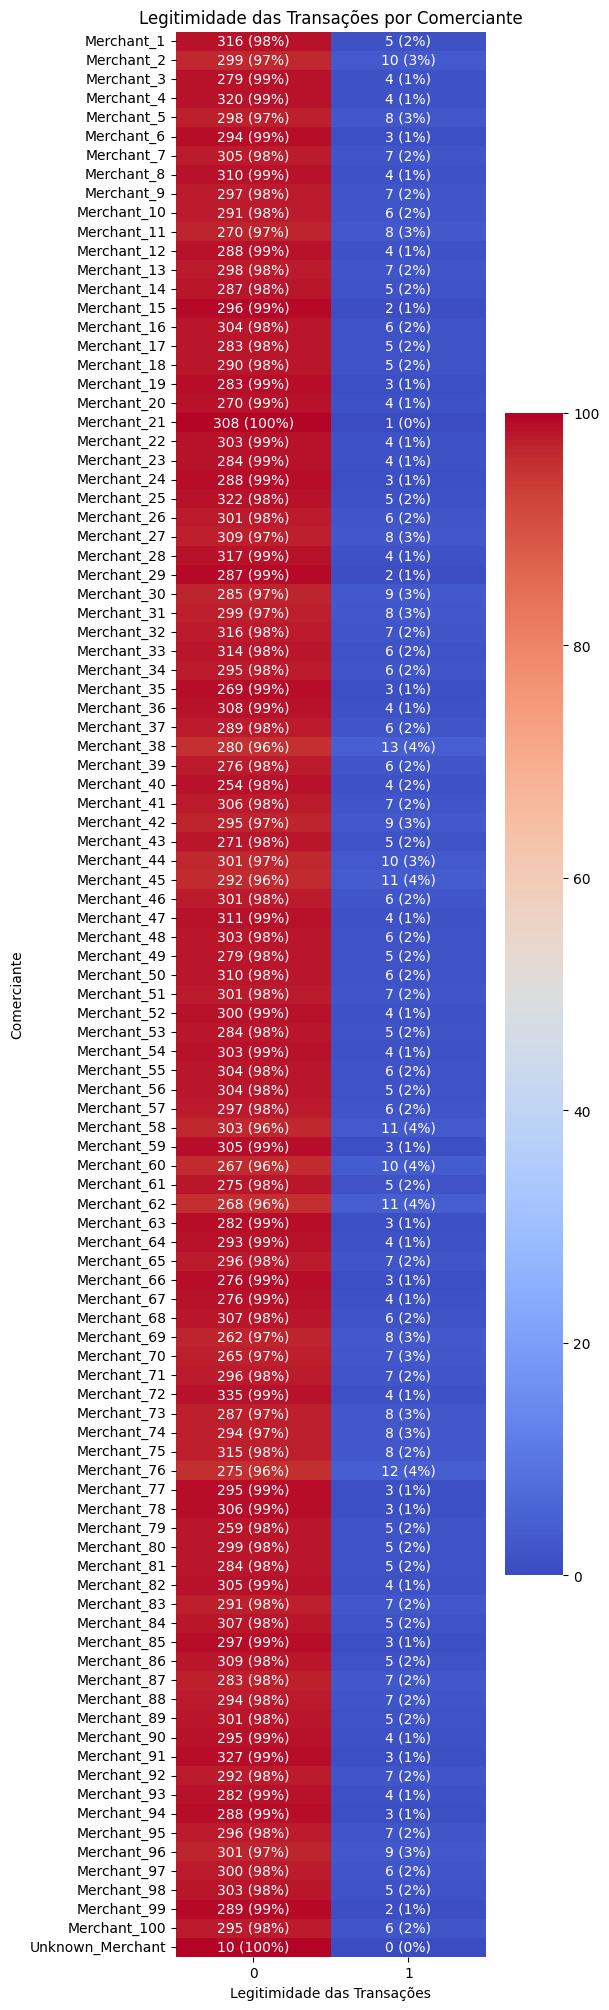

In [26]:
plt.figure(figsize = (5, 25))

table = pd.crosstab(transactions['merchant'], transactions['is_fraud'])
table = table.sort_values(by = 'merchant', key = lambda x: x.str.split('_').str[1].apply(lambda val: int(val) if val.isdigit() else float('inf')))
row_sum = table.sum(axis = 1)
percentages = (table.T / row_sum * 100).T
annotations = [['{} ({}%)'.format(count, round(percentage)) for percentage, count in zip(row, table_row)] for table_row, row in zip(table.values, percentages.values)]
sb.heatmap(percentages, annot = annotations, fmt = '', cmap = 'coolwarm')
contextualize("Legitimidade das Transações por Comerciante", "Legitimidade das Transações", "Comerciante")

Ao analisar o gráfico acima, podem extrair-se duas conclusões.

Em primeiro lugar, o comerciante *Unknown_Merchant* é aquele - cuja existência já fora identificada anteriormente - que não se encontra mapeado no conjunto de comerciantes com informação detalhada.
Em segundo lugar, observa-se também que este é o único comerciante que não tem nenhuma transação fraudulenta associada, sendo legítimas todas as transações nele efetuadas.

Para além disto, não se observa mais nenhuma relação entre transações fraudulentas e determinados comerciantes, tendo todos um rácio de transações fraudulentas que se encontra entre 1% e 4%.

Finalmente, pode existir alguma correlação significativa entre as variáveis, identificável através de um correlograma.

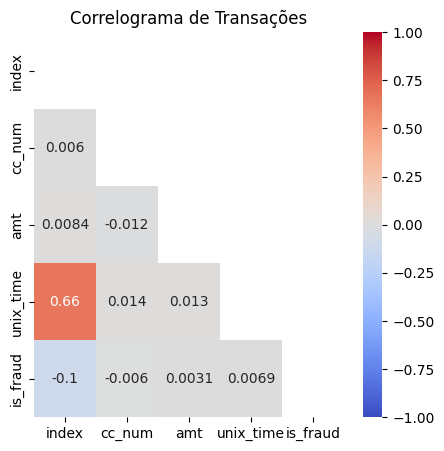

In [27]:
correlation = transactions.select_dtypes(['float', 'int']).corr()

plt.figure(figsize = (5, 5))
sb.heatmap(correlation, annot = True, cmap = 'coolwarm', mask = np.triu(np.ones_like(correlation, dtype = bool)), vmin = -1, vmax = 1)
contextualize('Correlograma de Transações', '', '')

No correlograma, existem apenas duas células que se destacam visualmente: (*unix_time*, *index*) com um coeficiente de correlação de 0,66 e (*is_fraud*, *index*) com um coeficiente de correlação de -0,1.

Contudo, como o atributo *index* é simplesmente o índice da transação, sendo, por isso, meramente indicativo e não informativo, não se pode extrair nada de significativo destas correlações. Efetivamente, o atributo *index* será, numa fase posterior, removido do conjunto de dados.

Assim, não se identifica nenhuma correlação relevante entre os atributos analisados para o conjunto de transações.

Em suma, extraem-se as seguintes conclusões desta fase:

- O conjunto de cidades parece conter dados corretos e plausíveis;
- No conjunto de clientes, o único fator de relevo é a existência de uma cidade *Test City*, que não se encontra mapeada no conjunto de cidades;
- No conjunto de comerciantes, a localização geográfica não parece ser uma informação credível, por remeter para demasiados pontos inviáveis/impossíveis, pelo que deverá ser desconsiderada;
- No conjunto de transações:
  - O único padrão/tendência que pode ter algum significado relevante é o facto de haver mais transações fraudulentas com quantias entre os 100 e os 400, em comparação com as transações de montantes fora deste intervalo;
  - Existe um comerciante *Unknown_Merchant* que é o único que só tem associadas transações legítimas;
  - Não existem correlações evidentes de alguma variável com a variável-alvo (*is_fraud*).

### Verificação da Qualidade dos Dados

Antes de preparar os dados para a sua ingestão por parte do modelo, deve aferir-se a sua qualidade, em particular quanto a valores em falta, valores duplicados/redundantes, erros (de codificação ou de medição), ou inconsistências, entre outros.

Note-se que as funções `pandas.DataFrame.isna()` e `pandas.DataFrame.isnull()` são estritamente equivalentes, isto é, têm exatamente o mesmo significado e realizam exatamente o mesmo, pelo que só se utilizará uma delas.

In [28]:
cities.isnull().sum()

city        0
lat         0
long        0
city_pop    0
state       0
dtype: int64

Deste modo, verifica-se que não existem valores em falta no conjunto de cidades.

In [29]:
customers.isnull().sum()

cc_num     0
first      0
last       0
gender     0
street     0
city       0
zip       20
job       20
dob        0
dtype: int64

No conjunto de clientes, existem 20 clientes cujo código-postal e/ou profissão estão em falta, pelo que esses casos devem ser observados de forma mais detalhada.

In [30]:
customers[customers.isnull().any(axis = 1)]

,cc_num,first,last,gender,street,city,zip,job,dob
6,2801374844713453,Jane,Smith,F,1st Ave,Chicago,NaN,NaN,2002-10-12
49,3995222018549835,Alice,Jones,F,1st Ave,Los Angeles,NaN,NaN,1970-04-07
104,6595820336089781,John,Smith,M,1st Ave,New York,NaN,NaN,1969-02-09
133,6715685094256252,Joe,Davis,F,Elm St,Los Angeles,NaN,NaN,1964-01-01
142,6456820738894681,Bob,Jones,M,2nd Ave,Chicago,NaN,NaN,1963-01-07
242,8380676395244843,Joe,Clark,F,2nd Ave,New York,NaN,NaN,1968-02-21
262,2943708768126750,John,Davis,F,2nd Ave,Chicago,NaN,NaN,1997-06-30
318,4095489114638262,Mike,Johnson,M,Broadway,New York,NaN,NaN,1955-05-11
345,9522441117141112,Mike,Williams,M,Broadway,New York,NaN,NaN,1981-05-03
368,1001431780128805,John,Clark,F,Main St,Chicago,NaN,NaN,1993-07-11


Tal como é possível observar, todos os clientes com código-postal em falta também têm a profissão em falta e vice-versa, pelo que, posteriormente estes registos deverão poder ser eliminados, dado que apenas representam 20/1100 = 1,8% do total de clientes sendo, por isso, pouco significantes/representativos.

In [31]:
merchants.isnull().sum()

merchant       0
category       2
merch_lat      2
merch_long     0
merchant_id    0
dtype: int64

No conjunto de comerciantes, apenas existem 2 comerciantes com valores em falta (categoria e latitude), pelo que serão analisados.

In [32]:
merchants[merchants.isnull().any(axis = 1)]

,merchant,category,merch_lat,merch_long,merchant_id
80,Merchant_81,NaN,NaN,-20.261696,81
84,Merchant_85,NaN,NaN,76.433212,85


De forma análoga à anterior, os comerciantes com a categoria em falta também têm a latitude em falta e vice-versa, pelo que a eliminação desses registos terá um impacto mínimo no conjunto total de comerciantes, tendo em conta que só representam 2/100 = 2% do total.

Aliás, regressando ao gráfico "Legitimidade das Transações por Comerciante", observa-se que estes comerciantes (*Merchant_81* e *Merchant_85*) não estão associados a um número significativo de transações fraudulentas, pelo que a sua eliminação não deverá levar à perda de muita informação relevante para o modelo.

In [33]:
transactions.isnull().sum()

index                        0
trans_date_trans_time      100
cc_num                       0
device_os                17964
merchant                     0
amt                        100
trans_num                    0
unix_time                    0
is_fraud                     0
dtype: int64

Finalmente, o conjunto de transações é aquele que tem mais valores em falta e - dada a sua maior importância - deve ser alvo de uma análise mais aprofundada.

Os valores em falta na coluna *trans_date_trans_time* não são relevantes, porque esta coluna traduz a mesma informação que a coluna *unix_time* (é redundante), pelo que o atributo *trans_date_trans_time* será removido posteriormente, sem perda de informação.

In [34]:
transactions[transactions['amt'].isnull()][transactions['is_fraud'] == 1]

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
9958,2452,NaN,8071385341284566,NaN,Merchant_44,NaN,TRANS_620131,1698667500,1
9968,3588,NaN,3622556887399519,other,Merchant_5,NaN,TRANS_471519,1685949525,1


Dos 100 valores em falta da coluna *amt*, apenas 2 correspondem a transações fraudulentas.

Uma destas duas transações tem em falta, para além da quantia, o valor do atributo *device_os*, pelo que a sua eliminação é decisão mais adequada a tomar dado que, caso contrário, teriam de ser imputados valores em duas colunas.

In [35]:
transactions[transactions['trans_num'] == 'TRANS_471519']

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
9968,3588,NaN,3622556887399519,other,Merchant_5,NaN,TRANS_471519,1685949525,1
24331,24331,2024-05-23 21:49:28.883202,4982979488642298,NaN,Merchant_56,353.56,TRANS_471519,1714024272,0


A outra transação com quantia em falta parece ser um erro, dado que existe uma outra transação com o mesmo número (que devia ser único), mas com dados totalmente diferentes. Como tal, para evitar introduzir erros no modelo, ambas as transações com o número *TRANS_471519* deverão ser eliminadas futuramente.

Assim, todas as 100 transações com o valor do atributo *amt* em falta podem ser eliminadas com segurança.

Por último, note-se que existem quase 18000 valores em falta na coluna *device_os*, o que corresponde a mais de metade do conjunto de transações (30000). Assim sendo, visto que (1) este atributo pode ser relevante para o modelo, pelo que não deve ser eliminado e (2) eliminar as linhas com valores em falta levaria a uma redução drástica do conjunto de dados para menos de metade do conjunto inicial, a decisão a tomar é imputar os valores em falta.

In [36]:
print("Fraud Rate")
for category in transactions['device_os'].dropna().unique():
    rate =  round(100 * transactions[transactions['device_os'] == category][transactions['is_fraud'] == 1].shape[0]/transactions[transactions['device_os'] == category].shape[0], 2)
    print(f"{category}: {rate}%")

rate =  round(100 * transactions[transactions['device_os'].isnull()][transactions['is_fraud'] == 1].shape[0]/transactions[transactions['device_os'].isnull()].shape[0], 2)
print(f"Missing Values: {rate}%")

Fraud Rate
macOS: 2.27%
X11: 2.12%
other: 2.11%
Windows: 2.03%
Linux: 1.93%
Missing Values: 1.76%


Tendo em conta que a coluna *device_os* só contém 5 valores únicos (*Linux*, *Windows*, *X11*, *macOS* e *other*) e todos eles têm um rácio de transações fraudulentas consideravelmente superior ao rácio de transações fraudulentas para o conjunto das linhas com *device_os* em falta (1,76%), a decisão considerada mais admissível é criar uma nova categoria denominada *unknown* e atribuí-la aos valores em falta na coluna *device_os*, de maneira a não perder informação nem enviesar o modelo.

Concluída a análise sobre valores em falta, devem tambem procurar-se valores duplicados/redundantes e eventuais erros.

In [37]:
cities.nunique()

city        5
lat         5
long        5
city_pop    5
state       5
dtype: int64

No conjunto de cidades, todos os valores são únicos e a sua correção pode ser verificada através da observação de todos os valores, tendo em conta que são apenas 5.

In [38]:
cities

,city,lat,long,city_pop,state
0,Los Angeles,34.0522,-118.2437,3979576,CA
1,Houston,29.7604,-95.3698,2328000,TX
2,Phoenix,33.4484,-112.0740,1680992,AZ
3,Chicago,41.8781,-87.6298,2716000,IL
4,New York,40.7128,-74.0060,8419600,NY


Observando todos os valores presentes no conjunto de cidades e comparando-os com os dados reais, confirma-se que todos os valores estão corretos.

In [39]:
cities.duplicated().sum()

0

Efetivamente, confirma-se que não existem cidades duplicadas.

In [40]:
cities['city'].duplicated().sum()

0

Em particular, verifica-se também que não existem nomes de cidades duplicados, tal como esperado, tendo em conta que esta coluna deve corresponder à chave primária da tabela/relação.

In [41]:
customers.nunique()

cc_num    1100
first      108
last       108
gender       2
street     102
city         6
zip       1077
job          7
dob       1062
dtype: int64

No conjunto de clientes, verifica-se que apenas existem 108 nomes e 108 apelidos, o que não parece plausível para 1100 pessoas. Isto poderá significar que os nomes e apelidos foram modificados para garantir o anonimato dos clientes, o que dá mais força à teoria de serem atributos irrelevantes para o modelo, pelo que podem e devem ser removidos posteriormente.

De forma análoga, 102 moradas distintas parece um valor extremamente pequeno para 1100 pessoas, o que deverá ser um indicativo do mesmo facto, isto é, de que as moradas foram alteradas para assegurar o anonimato dos clientes e, por isso, este é mais um atributo sem relevância para o modelo, pelo que deve ser eliminado posteriormente.

Em sentido inverso, o número de códigos-postais únicos e de datas de nascimento únicas parece plausível, ainda que isso não signifique que são atributos relevantes, mas apenas que os seus valores deverão estar corretos.

In [42]:
customers['gender'].unique()

array(['M', 'F'], dtype=object)

Os valores para o género também estão corretos, de acordo com a codificação esperada (*M* para masculino e *F* para feminino).

In [43]:
customers['city'].unique()

array(['Los Angeles', 'Houston', 'Phoenix', 'Chicago', 'New York',
       'Test City'], dtype=object)

Na coluna *city*, tal como verificado anteriormente no gráfico "Numero de Clientes por Cidade", destaca-se apenas a cidade *Test City*.
Continuam a subsistir dúvidas sobre o significado desta cidade, mas não pode ser considerada um erro, apesar de não pertencer ao conjunto de cidades, pelo que não se planeia, para já, a sua remoção do conjunto de dados.

In [44]:
customers['job'].unique()

array(['Lawyer', 'Clerk', 'Doctor', 'Teacher', 'Engineer', 'Nurse', nan,
       'Artist'], dtype=object)

O atributo *job* contém os valores únicos esperados, de acordo com o observado anteriormente no gráfico "Número de Clientes por Emprego", sendo que os clientes com o valor do emprego como *nan* serão eliminados, em conformidade com o que já fora decidido previamente, por terem também o código-postal em falta.

In [45]:
customers.duplicated().sum()

0

Ao procurar por clientes duplicados, não se encontra nenhum, o que parece indicar que neste conjunto não existem valores duplicados.

In [46]:
customers['cc_num'].duplicated().sum()

0

De facto, confirma-se que não existem dois clientes com o mesmo número de cartão de crédito (o que seria impossível, logo, seriam duplicados), de modo que não existem duplicados no conjunto de clientes.

In [47]:
merchants.nunique()

merchant       100
category         5
merch_lat       98
merch_long     100
merchant_id    100
dtype: int64

A análise da unicidade nos atributos do conjunto de comerciantes revela que todas as colunas têm o número esperado de valores únicos/distintos, notando que a diferença na coluna *merch_lat* (98) em relação às restantes (100) se deve à existência de dois comerciantes com o valor deste atributo em falta, pelo que serão eliminados, tal como já discutido previamente.

In [48]:
merchants['category'].unique()

array(['Groceries', 'Apparel', 'Travel', 'Electronics', 'Entertainment',
       nan], dtype=object)

Analogamente aos empregos dos clientes, também as categorias dos comerciantes vão ao encontro do esperado para os valores desta coluna (já visualizados no gráfico "Número de Comerciantes por Categoria"), sendo que os comerciantes sem categoria (*nan*) serão removidos do conjunto de dados, pelas razões já explicitadas.

In [49]:
merchants.duplicated().sum()

0

Mais uma vez, não parecem existir comerciantes duplicados.

In [50]:
merchants['merchant'].duplicated().sum()

0

In [51]:
merchants['merchant_id'].duplicated().sum()

0

Efetivamente, nenhuma das chaves candidatas (*merchant* e *merchant_id*) para a tabela/relação de comerciantes tem valores duplicados, pelo que está garantida a ausência de duplicados no conjunto de comerciantes.

In [52]:
transactions.nunique()

index                    29970
trans_date_trans_time    29868
cc_num                    1101
device_os                    5
merchant                   101
amt                      22615
trans_num                29470
unix_time                29959
is_fraud                     2
dtype: int64

Por fim, os valores únicos nas colunas do conjunto de transações revelam algumas informações relevantes.

Os valores únicos para os atributos *trans_date_trans_time* e *unix_time* não evidenciam nenhum problema com os dados, visto que é possível que ocorram duas transações diferentes no mesmo instante.

A par disto, a unicidade nas colunas *cc_num* e *amt* também não revela nenhum padrão potencialmente anómalo ou suspeito, sendo estes valores plausíveis para um conjunto de 30000 transações (cerca de 27 por cliente/cartão de crédito, com 22615 quantias/montantes diferentes).

In [53]:
transactions['device_os'].unique()

array([nan, 'macOS', 'X11', 'other', 'Windows', 'Linux'], dtype=object)

Os valores únicos na coluna *device_os* correspondem aos já observados anteriormente no gráfico "Número de Transações por Sistema Operativo", sendo que já foi decidido o tratamento para as linhas com o valor deste atributo em falta.

In [54]:
transactions['merchant'].unique()

array(['Merchant_85', 'Merchant_23', 'Merchant_70', 'Merchant_33',
       'Merchant_90', 'Merchant_31', 'Merchant_79', 'Merchant_100',
       'Merchant_61', 'Merchant_75', 'Merchant_21', 'Merchant_97',
       'Merchant_34', 'Merchant_48', 'Merchant_64', 'Merchant_18',
       'Merchant_99', 'Merchant_54', 'Merchant_83', 'Merchant_10',
       'Merchant_53', 'Merchant_57', 'Merchant_66', 'Merchant_44',
       'Merchant_20', 'Merchant_65', 'Merchant_35', 'Merchant_76',
       'Merchant_80', 'Merchant_59', 'Merchant_67', 'Unknown_Merchant',
       'Merchant_41', 'Merchant_6', 'Merchant_89', 'Merchant_92',
       'Merchant_45', 'Merchant_68', 'Merchant_98', 'Merchant_12',
       'Merchant_19', 'Merchant_13', 'Merchant_11', 'Merchant_27',
       'Merchant_16', 'Merchant_51', 'Merchant_63', 'Merchant_88',
       'Merchant_95', 'Merchant_56', 'Merchant_14', 'Merchant_72',
       'Merchant_71', 'Merchant_78', 'Merchant_43', 'Merchant_28',
       'Merchant_58', 'Merchant_30', 'Merchant_74', 'Merc

Igualmente, os comerciantes associados às transações, pelo seu número (101), vão ao encontro do esperado - considerando o gráfico "Número de Transações por Comerciante" -, ressalvando a existência de um *Unknown_Merchant* que não consta do conjunto de comerciantes e no qual todas as transações são legítimas.

In [55]:
transactions[transactions['merchant'] == 'Unknown_Merchant']

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
41,6585,2023-01-02 10:15:42,9999999999999999,Linux,Unknown_Merchant,205.74,TRANS_424096,1672654542,0
3099,9056,2023-04-24 16:17:45,9999999999999999,NaN,Unknown_Merchant,429.71,TRANS_600461,1682353065,0
3957,1796,2023-05-26 20:47:34,9999999999999999,Windows,Unknown_Merchant,358.45,TRANS_232993,1685134054,0
4861,1315,2023-06-28 14:16:13,9999999999999999,NaN,Unknown_Merchant,322.15,TRANS_412594,1687961773,0
5185,5361,2023-07-11 16:24:10,9999999999999999,NaN,Unknown_Merchant,114.40,TRANS_227400,1689092650,0
7336,1182,2023-09-29 11:49:37,9999999999999999,macOS,Unknown_Merchant,316.68,TRANS_414107,1695988177,0
7858,1211,2023-10-18 01:11:38,9999999999999999,Windows,Unknown_Merchant,226.24,TRANS_512128,1697591498,0
7950,5076,2023-10-20 17:11:41,9999999999999999,NaN,Unknown_Merchant,307.48,TRANS_940863,1697821901,0
7956,7145,2023-10-20 21:24:16,9999999999999999,NaN,Unknown_Merchant,360.26,TRANS_773603,1697837056,0
9564,9889,2023-12-18 21:43:14,9999999999999999,NaN,Unknown_Merchant,148.67,TRANS_170305,1702935794,0


Observando com mais detalhe as transações associadas ao comerciante *Unknown_Merchant*, verifica-se que, para além de serem todas legítimas, todas estão associadas ao número de cartão de crédito *9999999999999999*, o que parece indicar um erro nestes registos. Como tal, tomando em consideração que, dada o elevado de número de transações legítimas, eliminar 10 transações deste tipo não impactará significativamente o modelo, assume-se que a decisão mais acertada é eliminar estes registos, eliminando, assim, o comerciante *Unknown_Merchant*.

In [56]:
transactions['is_fraud'].unique()

array([0, 1], dtype=int64)

Os valores na coluna *is_fraud* (variável-alvo) seguem a codificação esperada, isto é, 0 para transação legítima e 1 para transação fraudulenta.

Concluída a análise destas colunas, restam os atributos *index* e *trans_num*, que deveriam ser únicos, isto é, deveriam existir tantos valores nestas colunas como o número de transações, ou seja, 30000. Contudo, não é isto que sucede.

Em primeiro lugar, como o número de valores únicos na coluna *index* (29970) é inferior ao número de transações (30000), deverão existir valores duplicados nesta coluna.

In [57]:
transactions['index'].duplicated().sum()

30

Ora, como existem valores duplicados para o atributo *index* e tal não devia acontecer, as linhas duplicadas terão de ser removidas posteriormente.

In [58]:
transactions[transactions['index'].duplicated()][transactions['is_fraud'] == 1]

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud


Contudo, nenhuma das linhas com índice duplicado corresponde a uma transação fraudulenta, o que permite eliminar estas transações sem perder informação muito relevante para o modelo, tendo em conta a escassez de transações fraudulentas, em contraste com a abundância de transações legítimas.

Em segundo lugar, similarmente, o valor do atributo *trans_num* deveria ser único para cada transação, mas existem apenas 29470 valores distintos nesta coluna, quando deveriam ser tantos quantas as transações, isto é, 30000. Como tal, existirão duplicados nesta coluna, o que compromete a integridade das transações a que estão associados.

In [59]:
transactions['trans_num'].duplicated().sum()

530

Efetivamente, confirma-se a existência de 530 transações com o número duplicado, pelo que terão de ser eliminadas futuramente.

In [60]:
transactions[transactions['trans_num'].duplicated()][transactions['is_fraud'] == 1]

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
8089,1566,2023-10-25 15:21:22,4599980840728872,NaN,Merchant_75,334.11,TRANS_672869,1698247282,1
10071,10071,2024-06-22 06:08:56.598575,9297907707489213,NaN,Merchant_16,27.47,TRANS_725772,1723249677,1
10087,10087,2024-05-24 07:18:52.600957,6452593798881681,macOS,Merchant_73,319.19,TRANS_983184,1718083579,1
10140,10140,2024-01-18 02:55:34.610484,3530953117040257,other,Merchant_2,363.63,TRANS_574290,1724316958,1
10190,10190,2023-11-08 09:39:30.621160,6905316705853865,macOS,Merchant_7,102.86,TRANS_514909,1720972634,1
10198,10198,2023-12-09 06:56:57.622828,4982979488642298,Windows,Merchant_6,425.33,TRANS_293284,1722541538,1


Observando de forma detalhada as transações com *trans_num* duplicado, conclui-se que apenas 6 das 530 (1,1%) são fraudulentas, o que permite inferir que a eliminação das 530 transações com número duplicado não prejudicará o modelo, dado que apenas são removidas uma pequena fração das transações fraudulenta e que, de outro modo, seria impossível garantir a integridade do conjunto de transações.

In [61]:
transactions.duplicated().sum()

9

Assim, serão, consequentemente, eliminadas as 9 transações duplicadas.

Numa análise agregada dos quatro conjuntos de dados, tomando em consideração as conclusões observadas nesta fase e na anterior, constata-se que:
- Todos os valores do conjunto de cidades parecem estar corretos;
- Excluindo as colunas *first*, *last* e *street*, todos os valores do conjunto de clientes parecem plausíveis;
- No conjunto de comerciantes, as coordenadas de localização geográfica (*merch_lat* e *merch_long*) devem ser eliminadas por não serem confiáveis;
- O conjunto de transações tem mais especificidades, detalhadas de seguida.

Em suma, as conclusões que se extraem desta etapa para fase de preparação dos dados são as seguintes:
- O conjunto de cidades não deve sofrer alterações (devidas à falta de qualidade dos dados, podendo sofrer alterações por outros motivos, nomeadamente pela relevância dos seus atributos);
- No conjunto de clientes, eliminar/remover:
  - As linhas com os atributos *zip* e *job* em falta (20);
  - As colunas *first*, *last* e *street*, por estarem alteradas/modificadas para garantir anonimato e, por isso, tornarem-se irrelevantes;
- No conjunto de comerciantes, eliminar/remover:
  - As linhas com os atributos *category* e *merch_lat* em falta (2 - *Merchant_81* e *Merchant_85*);
  - As colunas *merch_lat* e *merch_long*, por não serem confiáveis;
- No conjunto de transações, eliminar/remover:
  - A coluna *trans_date_trans_time*, por ser redundante (em relação a *unix_time*);
  - As linhas com o atributo *amt* em falta (100);
  - A linha com o valor do atributo *trans_num* a *471519*;
  - As linhas com o valor do atributo *cc_num* a *9999999999999999* e *merchant* a *Unkown_Merchant* (10);
  - As linhas com o valor do atributo *index* duplicado (30);
  - As linhas com o valor do atributo *trans_num* duplicado (530);
  - As linhas duplicadas (9), como consequência das eliminações/remoções anteriores;
- No conjunto de transações, imputar:
  - O valor do atributo *device_os* como *unknown*, quando estiver em falta (17964);

Assim, globalmente, foram identificados os erros do conjunto de dados e decididas quais as medidas a tomar para os corrigir.

## Preparação dos Dados

### Seleção dos Dados

No conjunto de cidades, toda a informação é considerada correta. Contudo, dado que a localização dos comerciantes foi considerada incorreta e, por isso, será removida, a localização das cidades vê a sua relevância diminuída, pelo que deverá, igualmente, ser excluída.

Assim, restam os atributos *city*, *city_pop* e *state*.

Numa fase posterior, analisada a relevância destes atributos, poderão vir a ser removidos. Ainda assim, nesta fase, serão mantidos no conjunto de dados.

In [62]:
selected_cities = cities.drop(['lat', 'long'], axis = 1)

selected_cities.head()

,city,city_pop,state
0,Los Angeles,3979576,CA
1,Houston,2328000,TX
2,Phoenix,1680992,AZ
3,Chicago,2716000,IL
4,New York,8419600,NY


Do conjunto de clientes, foi previamente determinado que as colunas *first*, *last* e *street* foram alteradas/modificadas para garantir o anonimato dos clientes, tornando-se, assim, irrelevantes, pelo que esses atributos devem ser removidos.

Os restantes atributos podem ser mantidos para já, mas a sua relevância será determinada posteriormente, verificando a existência de alguma relação com a variável-alvo.

In [63]:
selected_customers = customers.drop(['first', 'last', 'street'], axis = 1)

selected_customers.head()

,cc_num,gender,city,zip,job,dob
0,2468117351683689,M,Los Angeles,14540.0,Lawyer,1992-12-07
1,7312796986089604,F,Houston,24562.0,Clerk,1969-09-29
2,8219705739824918,M,Phoenix,60521.0,Doctor,2002-12-20
3,9983622937436029,F,Phoenix,71277.0,Teacher,1970-03-13
4,5847400826403727,M,Los Angeles,69097.0,Engineer,1986-08-20


Do conjunto de comerciantes, observou-se que as coordenadas de localização geográfica não são confiáveis, pelo que os atributos *merch_lat* e *merch_long* devem ser eliminados.

Para além disto, o atributo *merchant* é aquele que será útil para a junção desta tabela com o conjunto de transações, de maneira que o atributo *merchant_id* se torna redundante, sendo, assim, eliminado.

In [64]:
selected_merchants = merchants.drop(['merch_lat', 'merch_long', 'merchant_id'], axis = 1)

selected_merchants.head()

,merchant,category
0,Merchant_1,Groceries
1,Merchant_2,Groceries
2,Merchant_3,Groceries
3,Merchant_4,Apparel
4,Merchant_5,Apparel


No conjunto de transações, a coluna *trans_date_trans_time* é redundante (devido à existência do atributo *unix_time*), de modo que foi decidido optar-se pela sua eliminação.

Os atributos *index* e *trans_num*, ainda que sejam irrelevantes, não podem ser removidos nesta fase, porque serão necessários para proceder à limpeza dos dados. Todavia, efetuada a limpeza necessária dos dados, estas colunas serão removidas por serem irrelevantes.

In [65]:
selected_transactions = transactions.drop('trans_date_trans_time', axis = 1)

selected_transactions.head()

,index,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud
0,5381,2801374844713453,NaN,Merchant_85,252.75,TRANS_662964,1672533543,0
1,4008,3460245159749480,NaN,Merchant_23,340.17,TRANS_134939,1672535768,0
2,1221,7308701990157768,macOS,Merchant_70,76.38,TRANS_258923,1672536268,0
3,9609,8454886440761098,X11,Merchant_33,368.88,TRANS_226814,1672538817,0
4,5689,6350332939133843,NaN,Merchant_90,323.32,TRANS_668449,1672539054,0


### Limpeza dos Dados

Conforme o que foi anteriormente determinado, não existe necessidade de limpar o conjunto de cidades.

In [66]:
clean_cities = selected_cities

No conjunto de clientes, devem ser limpas as 20 linhas com *zip* e *job* em falta.

In [67]:
clean_customers = selected_customers.dropna(subset = ['zip', 'job'])

print("Rows cleaned:", selected_customers.shape[0] - clean_customers.shape[0])

Rows cleaned: 20


No conjunto de comerciantes, devem ser limpas as 2 linhas com *category* em falta. Note-se que a coluna *merch_lat* já foi removida.

In [68]:
clean_merchants = selected_merchants.dropna(subset = ['category'])

print("Rows cleaned:", selected_merchants.shape[0] - clean_merchants.shape[0])

Rows cleaned: 2


No conjunto de transações, devem ser limpas:
  - As 100 linhas com o atributo *amt* em falta;

In [69]:
clean_transactions = selected_transactions.dropna(subset = ['amt'])

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 100


  - A linha com o valor do atributo *trans_num* a *471519*;

In [70]:
selected_transactions = clean_transactions

clean_transactions = selected_transactions[selected_transactions['trans_num'] != 'TRANS_471519']

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 1


  - As 10 linhas com o valor do atributo *cc_num* a *9999999999999999* e *merchant* a *Unkown_Merchant*;

In [71]:
selected_transactions = clean_transactions

clean_transactions = selected_transactions[(selected_transactions['cc_num'] != 9999999999999999) & (selected_transactions['merchant'] != 'Unknown_Merchant')]

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 10


  - As 30 linhas com o valor do atributo *index* duplicado;

In [72]:
selected_transactions = clean_transactions

clean_transactions = selected_transactions.drop_duplicates(subset = ['index'])

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 20


Note-se que o valor de linhas limpas é menor do que 30 porque algumas linhas com o valor do atributo *index* duplicado já terão sido eliminadas fruto de limpezas anteriormente efetuadas.

  - As 530 linhas com o valor do atributo *trans_num* duplicado;

In [73]:
selected_transactions = clean_transactions

clean_transactions = selected_transactions.drop_duplicates(subset = ['trans_num'])

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 498


Note-se que o valor de linhas limpas é menor do que 530 porque algumas linhas com o valor do atributo *trans_num* duplicado já terão sido eliminadas fruto de limpezas anteriormente efetuadas.

  - As 9 linhas duplicadas, como consequência das eliminações/remoções anteriores;

In [74]:
selected_transactions = clean_transactions

clean_transactions = selected_transactions.drop_duplicates()

print("Rows cleaned:", selected_transactions.shape[0] - clean_transactions.shape[0])

Rows cleaned: 0


Assim, confirma-se que todas as linhas duplicadas já tinham sido previamente removidas e não restam valores duplicados no conjunto de transações.

Finalmente, resta apenas ser imputado o valor do atributo *device_os* como *unknown*, quando estiver em falta, ou seja, no máximo em 17964 casos.

In [75]:
before = clean_transactions['device_os'].isna().sum()

clean_transactions['device_os'] = clean_transactions['device_os'].fillna('unknown')

print("Rows changed:", before - clean_transactions['device_os'].isna().sum())

Rows changed: 17601


Tendo resolvido todos os problemas de valores em falta no conjunto de transações, já podem ser removidas as coluna irrelevantes *index* e *trans_num*.

In [76]:
clean_transactions = clean_transactions.drop(['index', 'trans_num'], axis = 1)

Deste modo, dá-se por concluída a limpeza dos dados, tendo sido resolvidos os problemas de valores em falta e erros nos dados.

### Construção de Novos Dados

De maneira a tentar melhorar o desempenho do modelo a desenvolver, podem ser seguido um processo de engenharia de funcionalidades para construir novos dados, derivados dos atributos existentes.

Neste caso em particular, existem três atributos que se considera que, modificados de algum modo, podem trazer informação mais relevante para o modelo.

Em primeiro lugar, no conjunto de clientes, existe o atributo *dob* para representar a data de nascimento de cada cliente. Contudo, tendo em conta que a data de nascimento tem como principal propósito a determinação da idade do cliente, este atributo *dob* pode ser substituído por um novo atributo já com a idade do cliente, denominado *age*, derivado a partir da data de nascimento.

In [77]:
clean_customers['age'] = (pd.to_datetime('today') - pd.to_datetime(customers['dob'])).dt.days // 365

clean_customers = clean_customers.drop('dob', axis = 1)

clean_customers.head()

,cc_num,gender,city,zip,job,age
0,2468117351683689,M,Los Angeles,14540.0,Lawyer,31
1,7312796986089604,F,Houston,24562.0,Clerk,55
2,8219705739824918,M,Phoenix,60521.0,Doctor,21
3,9983622937436029,F,Phoenix,71277.0,Teacher,54
4,5847400826403727,M,Los Angeles,69097.0,Engineer,38


Em segundo lugar, no conjunto de transações, o atributo *unix_time* representa o momento em que ocorreu cada transação. Todavia, este atributo pode tornar-se mais significativo e facilmente interpretável pelo modelo se for convertido/transformado numa data e hora da transação, ou seja, nos atributos *hour*, *day*, *month*, *year* e *weekday*

In [78]:
timestamp = pd.to_datetime(clean_transactions['unix_time'], unit='s')

clean_transactions['hour'] = timestamp.dt.hour
clean_transactions['day'] = timestamp.dt.day
clean_transactions['month'] = timestamp.dt.month
clean_transactions['year'] = timestamp.dt.year
clean_transactions['weekday'] = timestamp.dt.weekday

clean_transactions.head()

,cc_num,device_os,merchant,amt,unix_time,is_fraud,hour,day,month,year,weekday
0,2801374844713453,unknown,Merchant_85,252.75,1672533543,0,0,1,1,2023,6
1,3460245159749480,unknown,Merchant_23,340.17,1672535768,0,1,1,1,2023,6
2,7308701990157768,macOS,Merchant_70,76.38,1672536268,0,1,1,1,2023,6
3,8454886440761098,X11,Merchant_33,368.88,1672538817,0,2,1,1,2023,6
4,6350332939133843,unknown,Merchant_90,323.32,1672539054,0,2,1,1,2023,6


Em terceiro e último lugar, dado o contexto de deteção de fraude em transações de cartão de crédito, pode ser relevante medir a diferença temporal entre transações consecutivas para o mesmo cartão de crédito, na expectativa de que esta informação revele algum padrão sobre a legitimidade (ou não) de uma transação. Assim, pode ser derivado um atributo *time_since_last_transaction* com a distância temporal (em horas) de cada transação em relação à última transação com o mesmo cartão de crédito.

In [79]:
clean_transactions = clean_transactions.sort_values(by = ['cc_num', 'unix_time'])

clean_transactions['time_since_last_transaction'] = clean_transactions.groupby('cc_num')['unix_time'].diff()

clean_transactions['time_since_last_transaction'] = clean_transactions['time_since_last_transaction'] / 3600

clean_transactions['time_since_last_transaction'] = clean_transactions['time_since_last_transaction'].fillna(0)

clean_transactions = clean_transactions.drop('unix_time', axis = 1)

clean_transactions.head()

,cc_num,device_os,merchant,amt,is_fraud,hour,day,month,year,weekday,time_since_last_transaction
580,1001431780128805,unknown,Merchant_42,354.15,0,16,21,1,2023,5,0.000000
651,1001431780128805,unknown,Merchant_57,478.15,0,12,24,1,2023,1,68.155278
4291,1001431780128805,unknown,Merchant_86,177.68,0,10,8,6,2023,3,3237.587222
6229,1001431780128805,unknown,Merchant_61,275.31,0,0,17,8,2023,3,1670.694722
6515,1001431780128805,unknown,Merchant_88,86.68,0,3,28,8,2023,0,266.639722


Assim, espera-se que os dados traduzam mais informação relevante para o modelo, tendo em vista um melhor desempenho.

### Integração dos Dados

De forma a integrar todos os quatro conjuntos de dados num único conjunto de dados com toda a informação, deve ser feita a junção dos dados pelas chaves primárias de cada tabela.

In [80]:
data = clean_transactions.merge(clean_merchants, on = 'merchant', how = 'outer').merge(clean_customers.merge(clean_cities, on = 'city', how = 'outer'), on = 'cc_num', how = 'outer')

data.head()

,cc_num,device_os,merchant,amt,is_fraud,hour,day,month,year,weekday,time_since_last_transaction,category,gender,city,zip,job,age,city_pop,state
0,1001431780128805,unknown,Merchant_42,354.15,0,16,21,1,2023,5,0.000000,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001431780128805,unknown,Merchant_43,16.02,0,14,21,12,2023,3,2771.070556,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001431780128805,unknown,Merchant_57,478.15,0,12,24,1,2023,1,68.155278,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001431780128805,unknown,Merchant_61,275.31,0,0,17,8,2023,3,1670.694722,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001431780128805,unknown,Merchant_86,177.68,0,10,8,6,2023,3,3237.587222,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ao fazer a junção dos dados, verifica-se que existem muitos valores em falta, resultantes da operação de junção externa (*outer join*). Foi feita uma operação de junção externa em vez de junção interna (*inner join*) porque, caso contrário, seriam perdidos muitos dados potencialmente relevantes: tantos quantas as linhas com pelo menos um valor em falta.

Após a junção, o atributo *cc_num* já pode ser eliminado do conjunto de dados, porque essa coluna tinha como único propósito permitir a junção entre clientes e transações, sendo irrelevante para a determinação do valor da variável-alvo.

In [81]:
data = data.drop('cc_num', axis = 1)

data.head()

,device_os,merchant,amt,is_fraud,hour,day,month,year,weekday,time_since_last_transaction,category,gender,city,zip,job,age,city_pop,state
0,unknown,Merchant_42,354.15,0,16,21,1,2023,5,0.000000,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,Merchant_43,16.02,0,14,21,12,2023,3,2771.070556,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,unknown,Merchant_57,478.15,0,12,24,1,2023,1,68.155278,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unknown,Merchant_61,275.31,0,0,17,8,2023,3,1670.694722,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unknown,Merchant_86,177.68,0,10,8,6,2023,3,3237.587222,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Assim, agora devem ser averiguados os valores em falta e tomadas as decisões apropriadas.

In [82]:
data.isna().sum()

device_os                          0
merchant                           0
amt                                0
is_fraud                           0
hour                               0
day                                0
month                              0
year                               0
weekday                            0
time_since_last_transaction        0
category                         575
gender                           203
city                             203
zip                              203
job                              203
age                              203
city_pop                       19731
state                          19731
dtype: int64

Tal como é possível visualizar, as colunas com mais valores em falta são *city_pop* e *state*. Em teoria, muitos destes valores em falta poderão dever-se à cidade *Test City* já mencionada, que não tem informação no conjunto de cidades.

In [83]:
data[data['city'] == 'Test City'].shape[0]

19528

Efetivamente, confirma-se que 19528 dos 19731 (cerca de 99%) dos valores em falta para os atributos *city_pop* e *state* se devem à cidade *Test City*. Tendo em conta que a relevância destes atributos para a determinação do valor da variável-alvo é extremamente duvidosa, pode procurar confirmar-se esse facto para decidir a ação a tomar.

In [84]:
data['city_pop'].corr(data['is_fraud'])

-0.014267275639120577

Ora, a correlação entre a população da cidade à qual pertence um cliente e a legitimidade de uma transação que esse cliente efetua é praticamente nula, pelo que a coluna *city_pop* pode ser removida, sem considerável perda de informação.

In [85]:
data.groupby('state')['is_fraud'].mean()

state
AZ    0.018519
CA    0.016268
IL    0.018970
NY    0.013466
TX    0.017995
Name: is_fraud, dtype: float64

Similarmente, também não se verifica qualquer relação relevante entre a coluna *state* e a variável-alvo, pelo que este atributo também deverá ser removido.

In [86]:
clean_data = data.drop(['city_pop', 'state'], axis = 1)

clean_data.isna().sum()

device_os                        0
merchant                         0
amt                              0
is_fraud                         0
hour                             0
day                              0
month                            0
year                             0
weekday                          0
time_since_last_transaction      0
category                       575
gender                         203
city                           203
zip                            203
job                            203
age                            203
dtype: int64

Assim, o próximo passo é analisar os valores em falta nas colunas *category*. De acordo com os procedimentos efetuados anteriormente, o expectável é que estes valores sejam resultantes da eliminação dos dois comerciantes com valores em falta: *Merchant_81* e *Merchant_85*.

In [87]:
clean_data[clean_data['category'].isna()]['merchant'].unique()

array(['Merchant_85', 'Merchant_81'], dtype=object)

Confirmando-se a hipótese teorizada, pode verificar-se qual a proporção de transações fraudulentas associadas a estes comerciantes.

In [88]:
clean_data[clean_data['category'].isna()]['is_fraud'].sum()

8

Verificando-se que, em 575 transações, apenas 8 são fraudulentas (cerca de 1,4%), considera-se preferível eliminar as linhas com *category* em falta, em vez de eliminar o atributo *category* (por poder, eventualmente, ser relevante) ou fazer alguma imputação de valores.

In [89]:
clean_data = clean_data.dropna(subset = ['category'])

clean_data.isna().sum()

device_os                        0
merchant                         0
amt                              0
is_fraud                         0
hour                             0
day                              0
month                            0
year                             0
weekday                          0
time_since_last_transaction      0
category                         0
gender                         198
city                           198
zip                            198
job                            198
age                            198
dtype: int64

Finalmente, devem ser analisados os casos com *gender*, *city*, *zip*, *job* e *age* em falta. Estes casos dever-se-ão a clientes que foram eliminados em fases prévias do processo. Veja-se que, dada a natureza dos procedimentos efetuados, as transações com os valores destas colunas em falta serão coincidentes, isto é, há apenas 198 transações com valores em falta, sendo que em todas essas transações faltam os valores dos atributos *gender*, *city*, *zip*, *job* e *age*.

Assim, pode verificar-se a importância dessas transações na definição da variável-alvo.

In [90]:
clean_data[clean_data['gender'].isna()]['is_fraud'].sum()

4

Como a taxa de transações fraudulentas neste subconjunto de transações com valores em falta (2%) é similar ao rácio de transações fraudulentas para o conjunto completo de dados (determinado inicialmente), decide-se que eliminar estas 198 linhas é a ação mais acertar a realizar, não levando à perda de muita informação e resolvendo, definitivamente, o problemas dos valores em falta.

In [91]:
clean_data = clean_data.dropna(subset = ['gender'])

clean_data.isna().sum()

device_os                      0
merchant                       0
amt                            0
is_fraud                       0
hour                           0
day                            0
month                          0
year                           0
weekday                        0
time_since_last_transaction    0
category                       0
gender                         0
city                           0
zip                            0
job                            0
age                            0
dtype: int64

Assim, todos os dados estão integrados num único conjunto, que após a formatação será fornecido ao modelo.

### Formatação dos Dados

Como última etapa da fase de preparação de dados, os dados devem ser formatados para serem adequadamente ingeridos pelo modelo e para traduzirem adequadamente as grandezas que representam.

In [92]:
clean_data.dtypes

device_os                       object
merchant                        object
amt                            float64
is_fraud                         int64
hour                             int32
day                              int32
month                            int32
year                             int32
weekday                          int32
time_since_last_transaction    float64
category                        object
gender                          object
city                            object
zip                            float64
job                             object
age                            float64
dtype: object

In [93]:
data.head()

,device_os,merchant,amt,is_fraud,hour,day,month,year,weekday,time_since_last_transaction,category,gender,city,zip,job,age,city_pop,state
0,unknown,Merchant_42,354.15,0,16,21,1,2023,5,0.000000,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,Merchant_43,16.02,0,14,21,12,2023,3,2771.070556,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,unknown,Merchant_57,478.15,0,12,24,1,2023,1,68.155278,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unknown,Merchant_61,275.31,0,0,17,8,2023,3,1670.694722,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unknown,Merchant_86,177.68,0,10,8,6,2023,3,3237.587222,Groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

all_inputs = clean_data.drop(['is_fraud', 'device_os', 'merchant', 'category', 'gender', 'city', 'job'], axis = 1)

all_labels = clean_data['is_fraud']

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size = 0.25, random_state = 13)

decision_tree = DecisionTreeClassifier(random_state = 13)

decision_tree.fit(training_inputs, training_classes)

decision_tree_accuracy = decision_tree.score(testing_inputs, testing_classes)
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_accuracy * 100))

decision_tree_probs = decision_tree.predict_proba(testing_inputs)[:, 1]

# Calcule a AUC
decision_tree_auc = roc_auc_score(testing_classes, decision_tree_probs)
print('Decision Tree AUC: {:.2f}'.format(decision_tree_auc))

Decision Tree Accuracy: 95.26%
Decision Tree AUC: 0.51


## Análise Descritiva

In [96]:
clean_data = pd.get_dummies(clean_data, drop_first = True, dtype = int)

clean_data.to_csv('data.csv')